# COGS 108 - Final Project

##### Please use collection time: Friday 

---

# Overview

Within this project, we utilized a dataset called US accidents in order to answer the question of whether or not daylight savings caused more accidents to occur. We hypothesized that because circadian rhythms are significant in all forms of biological life, that a sudden disruption in one's schedule/life could lead to situations where accidents are more likely to occur. To answer this question, we compared two states (one following daylight savings and one not) and the number of accidents that occurred around the time of daylight savings to see if there is a difference. 
The results of our project was that we were unable to conclude that daylight savings had a negative impact on accidents, meaning we did not see an increase in the number of accidents around the time daylight savings was starting or ending. 

---

# Names

- Louisa Black
- Hank Liao
- Logan Miller
- Jacob Paulson
- Fatima Shirazi

---

# Research Question

Do accidents occur more often near the time when daylight savings begins and/or ends? If so, can we infer if the number of accidents will increase/decrease if the permanent change to daylight savings occurs?

---

# Background and Prior Work

Driving is one of the ways people commute or get around places. The school you go to or the company you work at is miles away, you just have to drive to get there. For example, many UCSD students need to drive to get to the campus, which also explains why there are so many parking lots or structures at UCSD. While driving may be essential, it also comes with the risk. The person turning might not pay attention and did not see that another car is already moving to the same street, and it will potentially lead to a car accident. The cause of an accident varies from case to case as there are many factors, such as time, weather condition, and road design, that contribute to an accident.

Drowsy driving is a serious safety issue with as many as 1 in 25 Americans reporting having fallen asleep at the wheel in the past 30 days according to the CDC [5]. While the exact definition of drowsy driving is loose it is described by the CDC as driving with a lack of sleep and affects reaction time, decision making, and ability to pay attention to the road [5]. It is common among drivers driving in the early morning, late afternoon, and late night as well as those that are lacking sleep [5]. The CDC claims that drowsy driving is responsible for 91,000 accidents in 2017 [5]. With drowsy driving being such a serious issue it calls safety concerns to Daylight Savings Time which affects the sleep schedule of many Americans. Daylight Savings Time always occurs on a Sunday which gives  Monday through Friday workers a day to acclimate, but it still poses a risk especially if compounded with other issues.

Due to the complexity of car accidents, we needed a set of data that describe the details of accidents so that we can better understand the underlying cause of accidents. A countrywide accident dataset is collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data [3]. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks [3]. A prior analysis was conducted which provided a holistic view of accidents across the states which we can reference to assist our research.

Along with our retrieved dataset, a github was included that gave a general analysis of the data using various different plots[4]. This github was a very useful tool when it came time to create our own analysis of more specific regions of the dataset but still using effective plots to portray the analysis.


##### References:

1. Centers for Disease Control and Prevention. (2022, November 21). Dangers of Drowsy Driving. https://www.cdc.gov/sleep/features/drowsy-driving.html
2. Moosavi, S. (2021, January 1). US-Accidents: A Countrywide Traffic Accident Dataset. Sobhan Moosavi. https://smoosavi.org/datasets/us_accidents
3. Moosavi, S. (2022, March 12). US Accidents (2016 - 2021). Kaggle. https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
4. S. (n.d.). GitHub - shubamsumbria/us-accidents-analysis: Exploratory Data Analysis on “US Accidents” dataset to find out and visualize different trends including impact of COVID-19 on traffic behavior and accidents, environmental stimuli on accident occurrence and accident hotspot locations in order to get control over the same. GitHub. https://github.com/shubamsumbria/us-accidents-analysis
5. The Editors. (n.d.). Daylight Saving Time 2023: When Does the Time Change? Almanac.com. https://www.almanac.com/content/when-daylight-saving-time
6. California Highway Patrol. (n.d.). SWITRS - Statewide Integrated Traffic Records System. https://www.chp.ca.gov/Programs-Services/Services-Information/SWITRS-Internet-Statewide-Integrated-Traffic-Records-System 

---

# Hypothesis

We hypothesize that daylight savings will increase the rate of accidents that happen in California because of the disruption to people’s routines and sleep schedules. We came to our hypothesis by determining that the main risk with daylight saving and accidents came not from the change in daylight hours, but the fact that people’s schedules changed at all - affecting individual’s circadian rhythms and general routines.

---

# Dataset(s)

Dataset Name: US Accidents (2016 - 2021)

Link to the Dataset: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents 

Number of Observations: 2906610 rows(795868 rows for CA) × 47 columns 

This dataset set contains US accidents that occurred within the years 2016 - 2021. Each accident is designated a row within the set with 47 columns that are a measurable feature of the accident itself. Such data in the columns are start time, state, weather, visibility, and many more. 

There are around 60k rows of data that are not accessible, potentially due to corruption during the download or upload process or due to the hardware capability to handle such a large amount of data. We think that since only a portion of data within these 60k, or worst case all of 60k, rows occur in California, and how 60k is relative to what we are able to access, these data won’t contribute a significant difference to our conclusion.

Following table is the breakdown of relevant data we are going to use:

| Attribute | Description |
| :- | :- |
| Start_Time | Shows start time of the accident in local time zone. |
| State	| Shows the state. |
| Hour | Shows the hour accident occur |
| Day | Shows the day accident occur |
| Month | Shows the month accident occur |
| Year | Shows the year accident occur |

---

# Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

##### Load Data

In [2]:
# Load Data
# Due to how large the dataset is, we have to break down the data to manageable chunks
# Divide the data into churnk using chunksize = 1,000,000
df = pd.read_csv("US_Accidents_Dec21_updated.csv", chunksize = 1000000)

---

# Data Cleaning

##### Data Filtering:

In [3]:
# The data is divided into 3 chunks
chunk1 = next(df)
chunk2 = next(df)
chunk3 = next(df)

# Filter out accidents that happen outside of CA
CAchunk1 = chunk1[chunk1.State == "CA"]
CAchunk2 = chunk2[chunk2.State == "CA"]
CAchunk3 = chunk3[chunk3.State == "CA"]
# Filter out accidents that happen outside of AZ
AZchunk1 = chunk1[chunk1.State == "AZ"]
AZchunk2 = chunk2[chunk2.State == "AZ"]
AZchunk3 = chunk3[chunk3.State == "AZ"]

# Merge the filtered chunks into a single dataframe
CAdf = pd.concat([CAchunk1, CAchunk2, CAchunk3])
AZdf = pd.concat([AZchunk1, AZchunk2, AZchunk3])

##### Show all 47 Attributes of the Data:

In [4]:
# Show all 47 attributes of the data
# CA and AZ have the same attribute
list(CAdf.columns)

['ID',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Number',
 'Street',
 'Side',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [5]:
# Keeping relevant data we need for the analysis
CAdf = CAdf[['Start_Time', 'State']]
AZdf = AZdf[['Start_Time', 'State']]

In [6]:
# Reset index
CAdf = CAdf.reset_index(drop=True)
AZdf = AZdf.reset_index(drop=True)

# Convert Start_Time to Timestamp object, and make the time accident occur more accessible
CAdf.Start_Time = pd.to_datetime(CAdf.Start_Time)
CAdf['Hour'] = CAdf['Start_Time'].dt.hour
CAdf['Day'] = CAdf['Start_Time'].dt.day
CAdf['Month'] = CAdf['Start_Time'].dt.month
CAdf['Year'] = CAdf['Start_Time'].dt.year

AZdf.Start_Time = pd.to_datetime(AZdf.Start_Time)
AZdf['Hour'] = AZdf['Start_Time'].dt.hour
AZdf['Day'] = AZdf['Start_Time'].dt.day
AZdf['Month'] = AZdf['Start_Time'].dt.month
AZdf['Year'] = AZdf['Start_Time'].dt.year

##### Display Filtered Data:

In [7]:
# Show cleaned data for CA
CAdf.head()

Start_Time State  Hour  Day  Month  Year
0 2016-03-22 18:53:11    CA    18   22      3  2016
1 2016-03-22 19:00:49    CA    19   22      3  2016
2 2016-03-22 20:07:32    CA    20   22      3  2016
3 2016-03-22 21:40:18    CA    21   22      3  2016
4 2016-03-22 21:36:42    CA    21   22      3  2016

In [8]:
# Show cleaned data for AZ
AZdf.head()

Start_Time State  Hour  Day  Month  Year
0 2016-11-30 13:35:51    AZ    13   30     11  2016
1 2016-11-30 15:01:56    AZ    15   30     11  2016
2 2016-11-30 15:19:52    AZ    15   30     11  2016
3 2016-11-30 15:39:50    AZ    15   30     11  2016
4 2016-11-30 17:05:39    AZ    17   30     11  2016

---

# Data Analysis & Results (EDA)

### Countplots Analysis

A countplot is a simple method of data analysis in which one has a variable that is displayed on the x-axis, and the counts of that variable are displayed on the y-axis. With this method, we utilized it to display the number counts of accident that occur for various times below.

The Countplot analysis we created provided an effective way to compare the differences between accident rates day by day, month by month, and year by year, which gave us a better sense of what larger-scale outliers existed (like the Covid-19 pandemic), and allowed us to better tell what info was more meaningful within our heatmaps.

First, let's examine what the data looks like broken down by year.

##### Countplot of Accident Counts VS Year for 2016~2021 in CA:

Text(0.5, 1.0, '2016 to 2021 Accident Counts in CA')

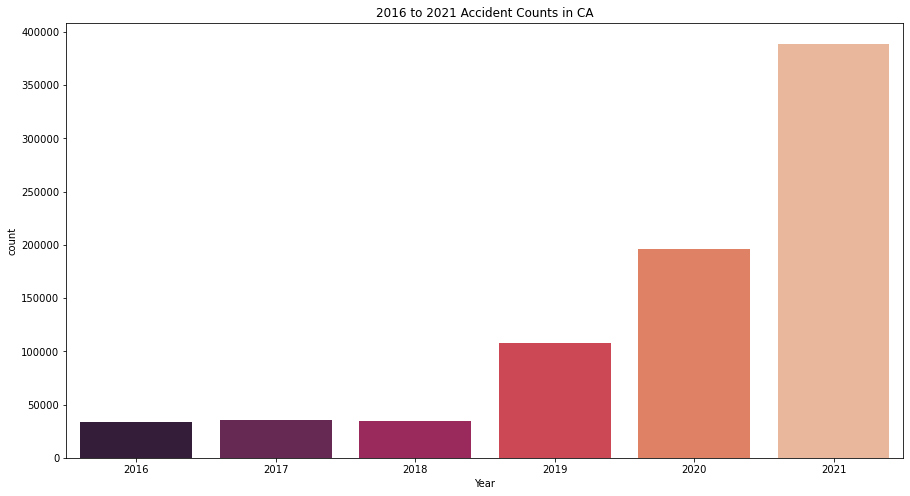

In [9]:
# Create figure
fig, axs = plt.subplots(figsize = (15,8))

# Plot countplot of accident counts vs year for 2016~2021 in CA
sns.countplot(ax = axs, x=CAdf['Year'], palette = "rocket")
axs.set_title("2016 to 2021 Accident Counts in CA")

##### Countplot of Accident Counts VS Year for 2016~2021 in AZ:

Text(0.5, 1.0, '2016 to 2021 Accident Counts in AZ')

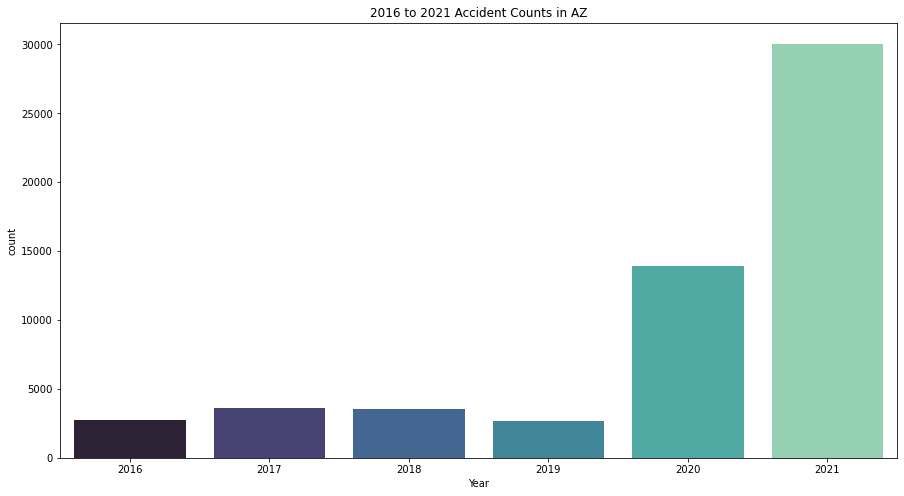

In [10]:
# Create figure
fig, axs = plt.subplots(figsize = (15,8))

# Plot countplot of accident counts vs year for 2016~2021 in AZ
sns.countplot(ax = axs, x=AZdf['Year'], palette = "mako")
axs.set_title("2016 to 2021 Accident Counts in AZ")

A clear trend is that the number of accidents in both CA and AZ stay somewhat close and increases significantly after 2019. There are approximately 200,000 accidents that occur every year in California with the number staying fairly steady from 2016 - 2019 according to the California Highway Patrol[6]. It is a safe assumption this number stays similar in 2020 and  2021, which means at best the dataset is missing 60% or more of all crash data in California for each year in the dataset.

---

Next, let's break down the data further by examining the number of accidents by month each year.

##### Countplot of Accident Counts VS Month for 2016~2021 in CA:

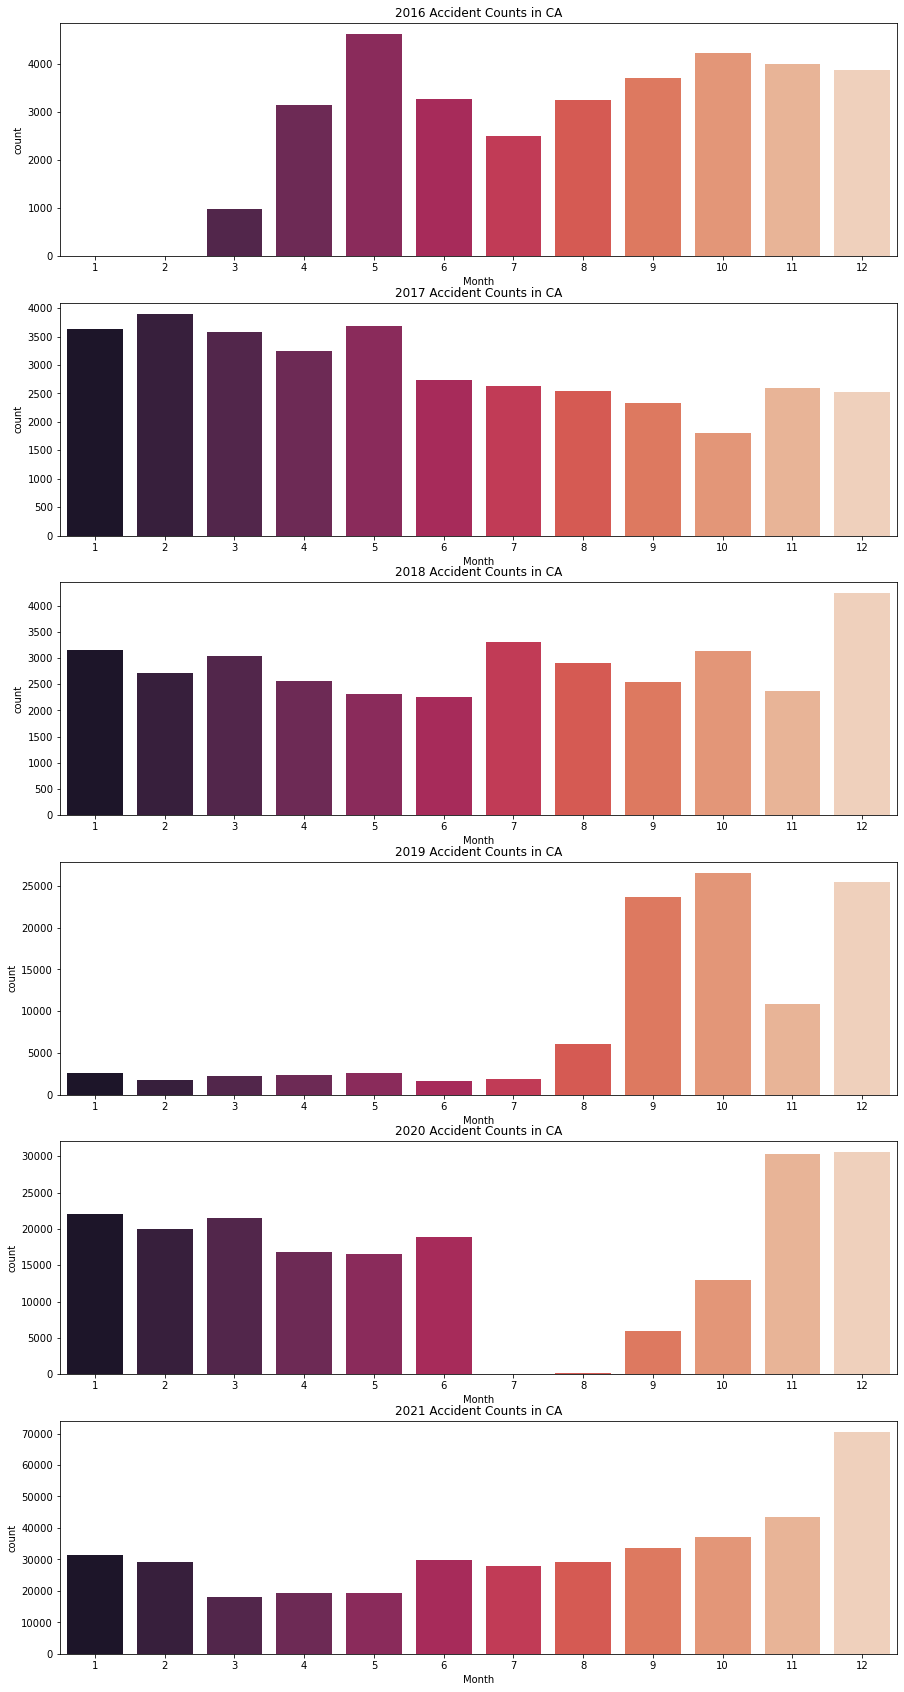

In [11]:
# Create figure
fig, axs = plt.subplots(6, 1, figsize = (15,30))

# Plot countplot of accident counts vs month for 2016~2021 in CA
years = range(2016, 2022)
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N], x=(CAdf[(CAdf['Year'] == Y)])['Month'], 
                  order = list(range(CAdf.Month.min(),CAdf.Month.max()+1)), palette = "rocket")
    axs[N].set_title(str(Y)+ " Accident Counts in CA")

##### Countplot of Accident Counts VS Month for 2016~2021 in AZ:

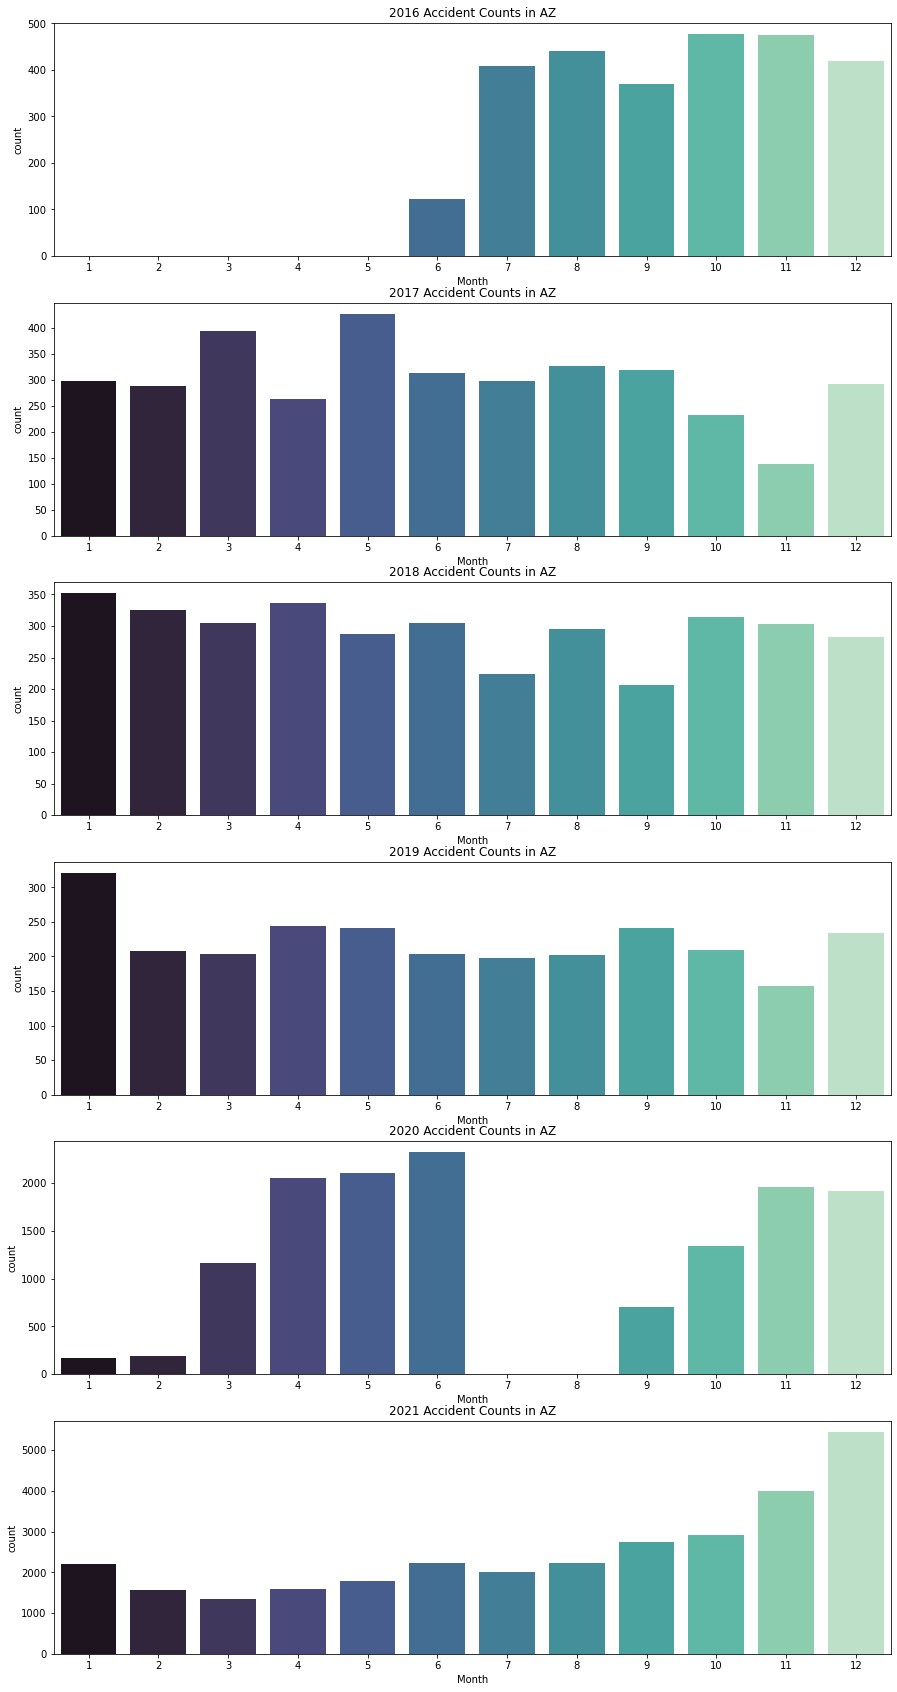

In [12]:
# Create figure
fig, axs = plt.subplots(6, 1, figsize = (15,30))

# Plot countplot of accident counts vs month for 2016~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N], x=(AZdf[(AZdf['Year'] == Y)])['Month'], 
                  order = list(range(AZdf.Month.min(),AZdf.Month.max()+1)), palette = "mako")
    axs[N].set_title(str(Y)+ " Accident Counts in AZ")

Since the accident data were collected from February 2016 to Dec 2021, some of the data in 2016 is unavailable potentially due to the issue of the data collection process as this project is just starting[2], so we dropped 2016 from the analysis. Another noticeable thing to take note of is in 2020, the accident counts for the month of July and August is zero/nearly zero. Again potentially due to issues with the data collection process, and it isn't going to affect our data analysis much as they are not the month where we are most interested.


---

Next, we zoomed in to the month when daylight saving happens to see the breakdown of the days that accidents occur. The count plots displayed the amount of accidents occurring throughout each day in **March** and **November**, as well as the month **prior** and **after** daylight saving for 2017 to 2021.

##### Countplot of Accident Counts VS Day for February, March, and April in CA:

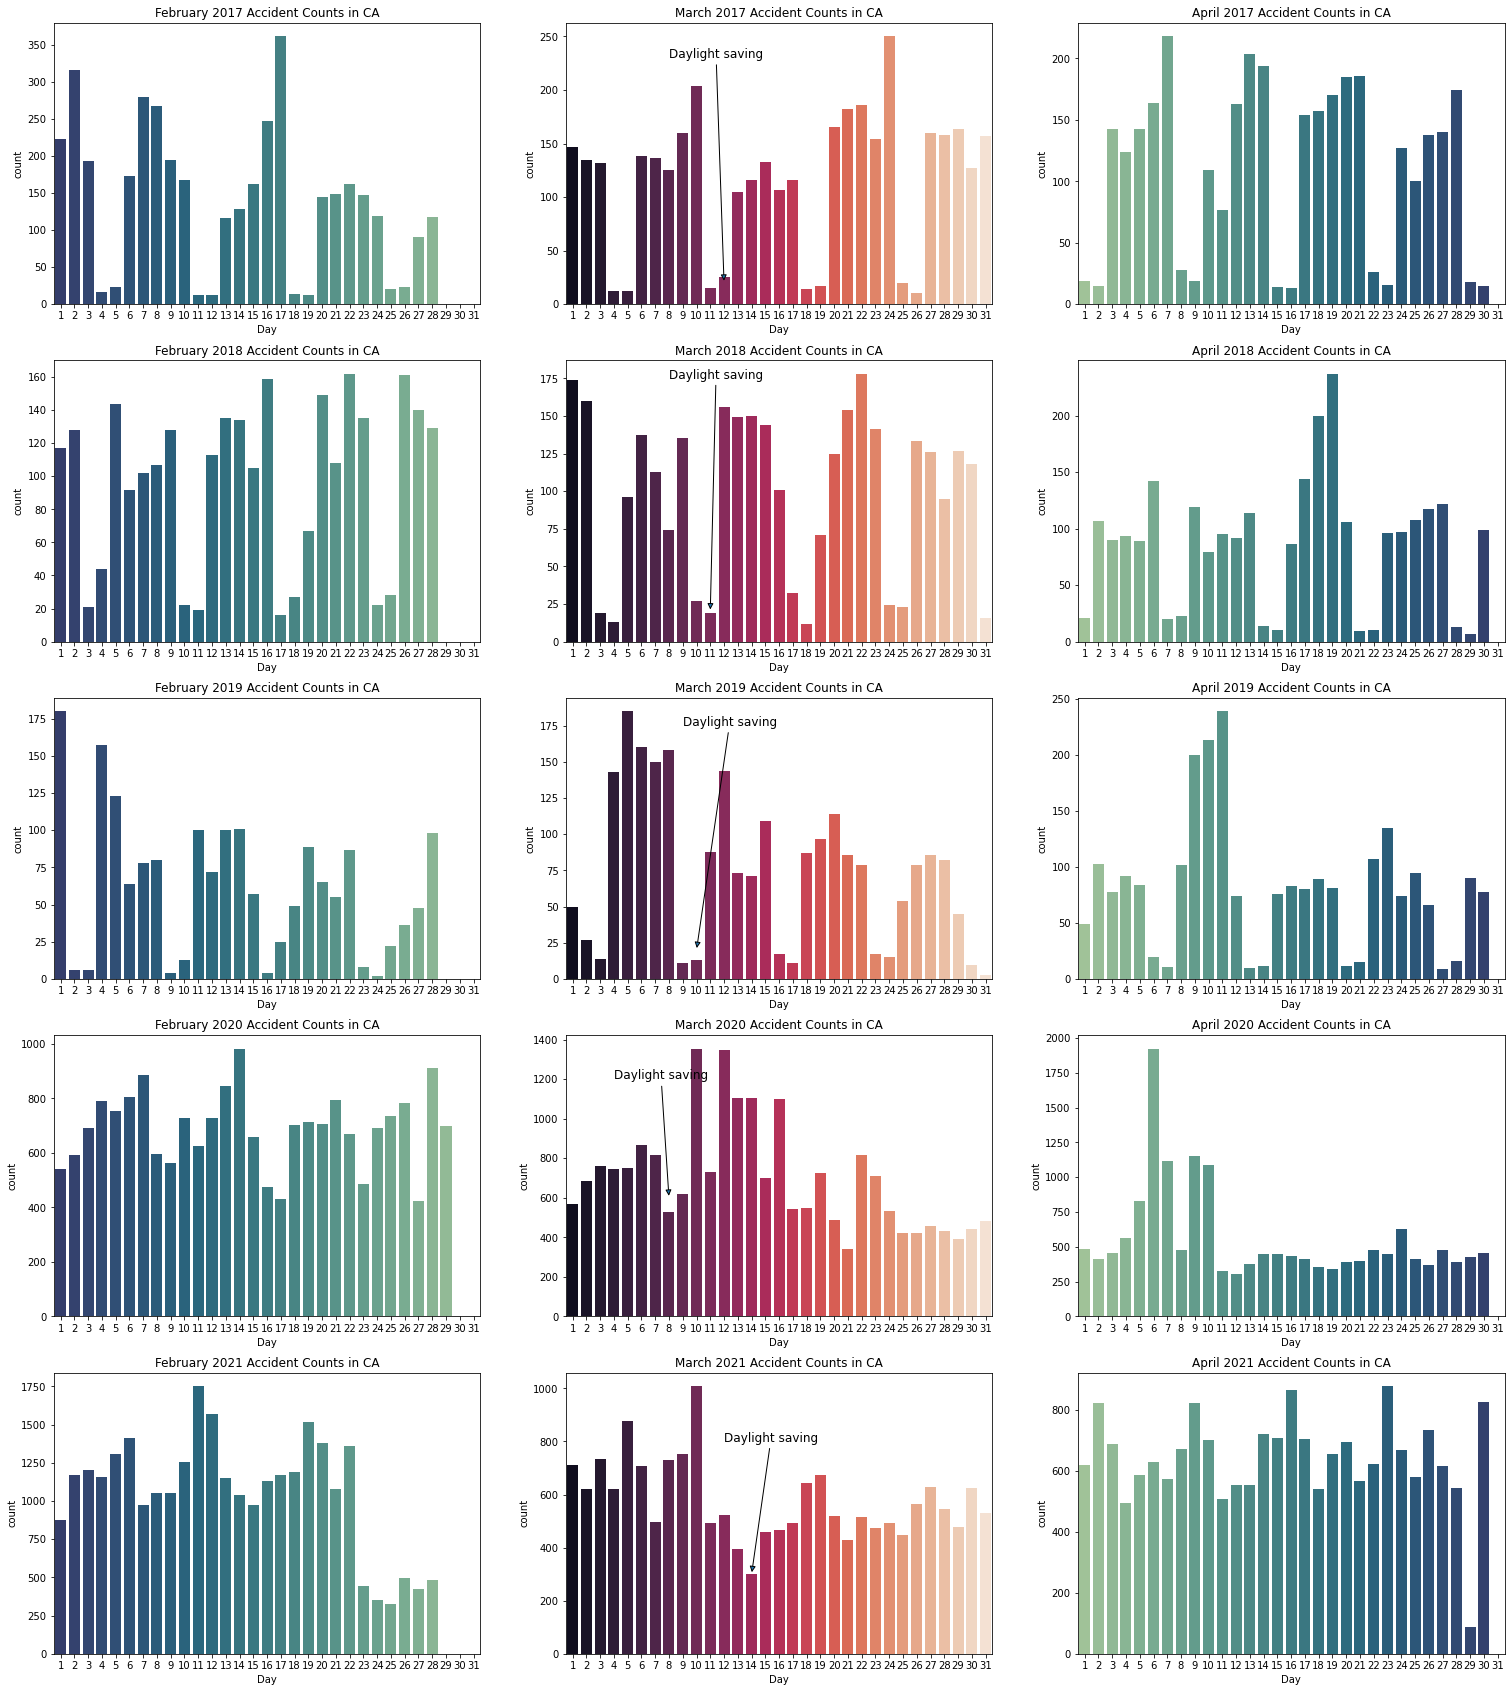

In [13]:
# Create figure
fig, axs = plt.subplots(5, 3, figsize = (26,30))

years = range(2017, 2022)

# Plot countplot of accident counts vs day for "February" 2017~2021 in CA
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 0], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 2)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "crest_r")
    axs[N, 0].set_title("February " + str(Y)+ " Accident Counts in CA")

# Plot countplot of accident counts vs day for "March" 2017~2021 in CA
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 1], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 3)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "rocket")
    axs[N, 1].set_title("March " + str(Y)+ " Accident Counts in CA")
# Marking the day daylight saving occur in CA
axs[0, 1].annotate('Daylight saving',xy=(11,20),xytext=(7,230),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 1].annotate('Daylight saving',xy=(10,20),xytext=(7,175),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 1].annotate('Daylight saving',xy=(9,20),xytext=(8,175),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 1].annotate('Daylight saving',xy=(7,600),xytext=(3,1200),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[4, 1].annotate('Daylight saving',xy=(13,300),xytext=(11,800),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

# Plot countplot of accident counts vs day for "April" 2017~2021 in CA
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 2], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 4)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "crest")
    axs[N, 2].set_title("April " + str(Y)+ " Accident Counts in CA")


##### Countplot of Accident Counts VS Day for February, March, and April in AZ:

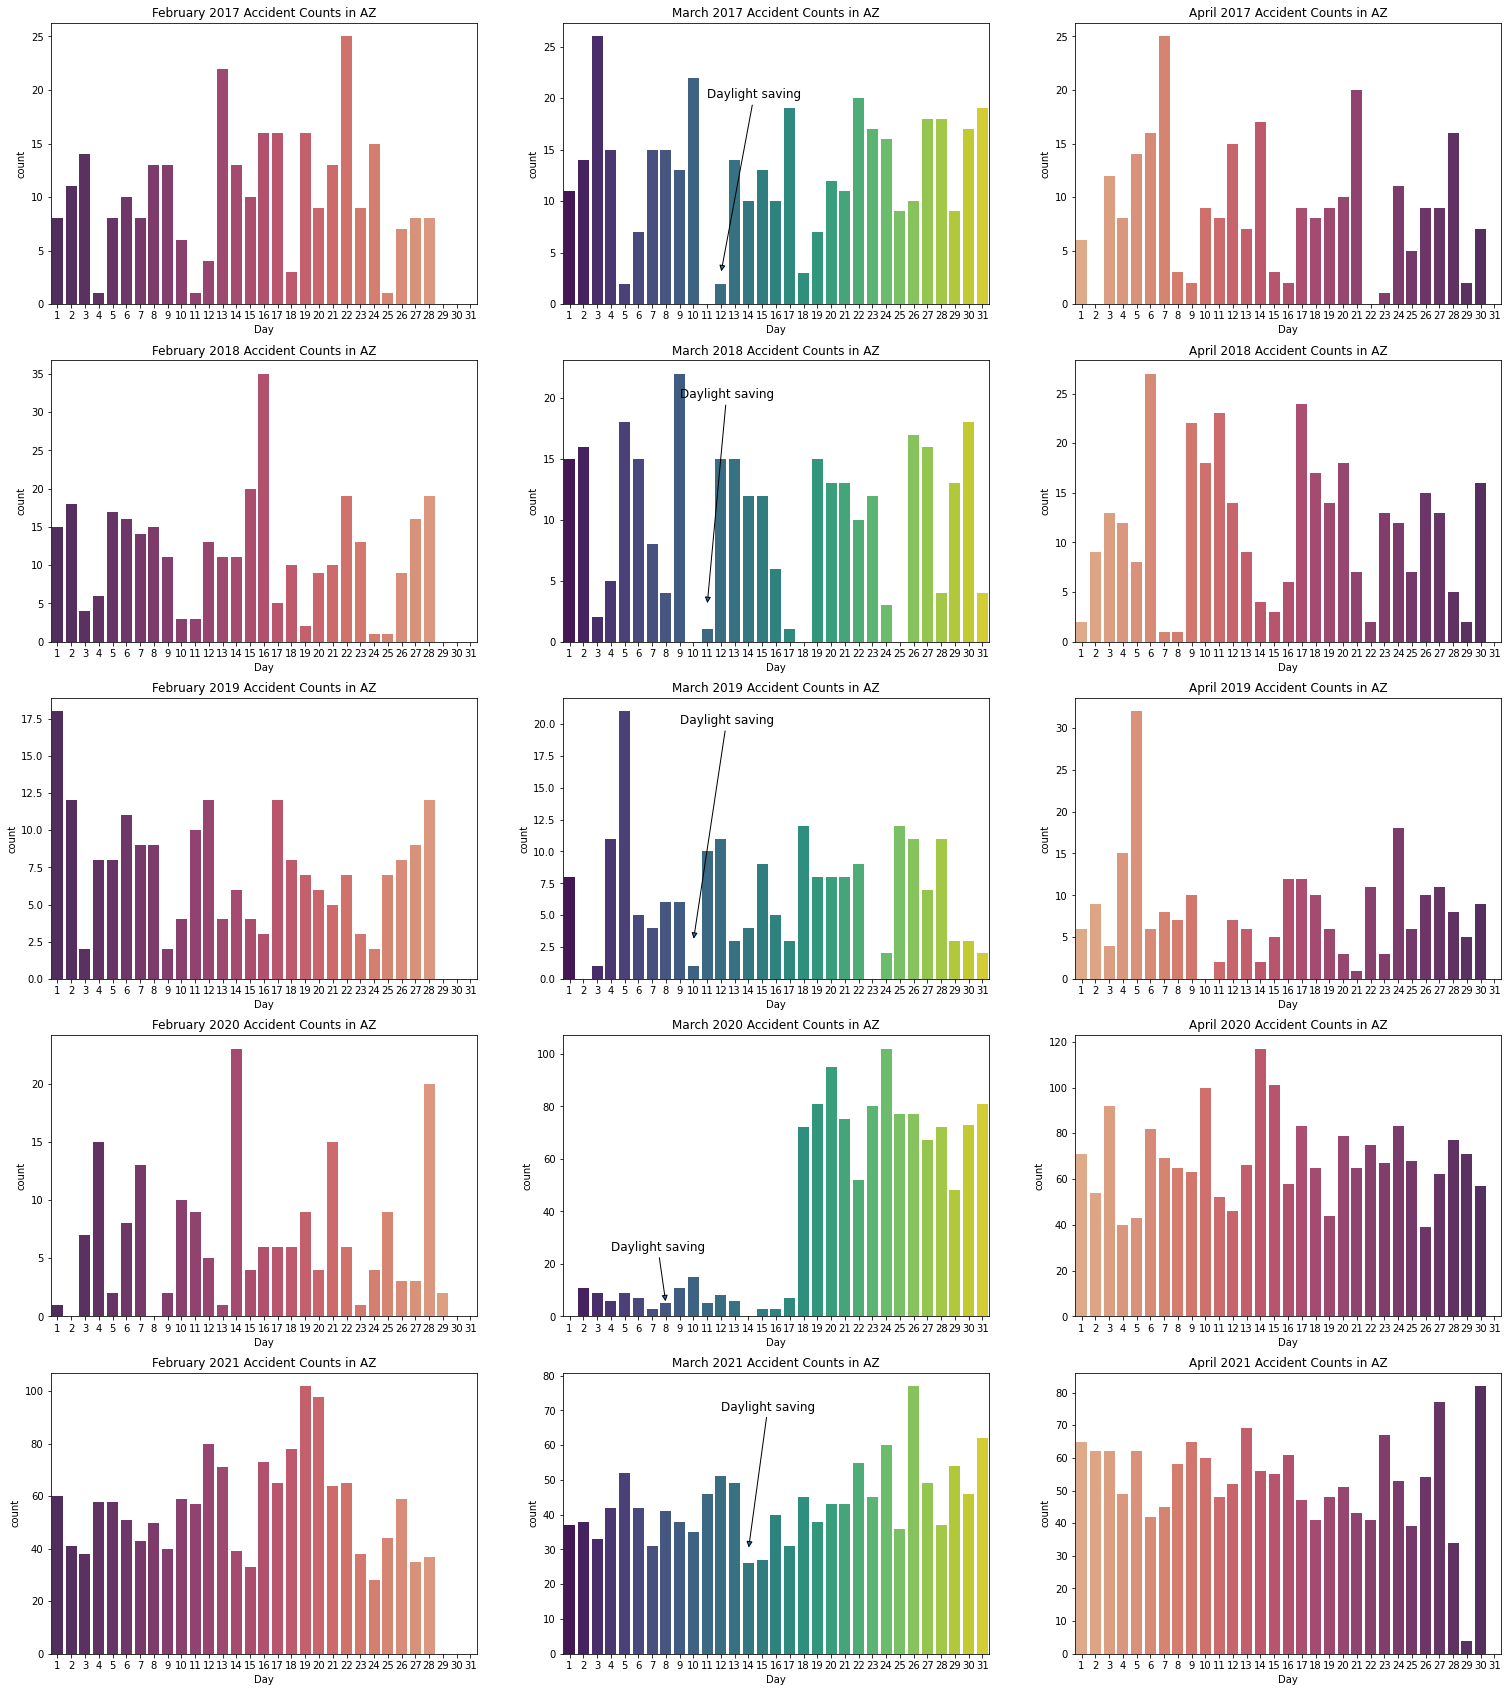

In [14]:
# Create figure
fig, axs = plt.subplots(5, 3, figsize = (26,30))

# Plot countplot of accident counts vs day for "February" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 0], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 2)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "flare_r")
    axs[N, 0].set_title("February " + str(Y)+ " Accident Counts in AZ")

# Plot countplot of accident counts vs day for "March" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 1], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 3)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "viridis")
    axs[N, 1].set_title("March " + str(Y)+ " Accident Counts in AZ")
# Marking the day daylight saving occur in AZ
axs[0, 1].annotate('Daylight saving',xy=(11,3),xytext=(10,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 1].annotate('Daylight saving',xy=(10,3),xytext=(8,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 1].annotate('Daylight saving',xy=(9,3),xytext=(8,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 1].annotate('Daylight saving',xy=(7,5),xytext=(3,25),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[4, 1].annotate('Daylight saving',xy=(13,30),xytext=(11,70),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

# Plot countplot of accident counts vs day for "April" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 2], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 4)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "flare")
    axs[N, 2].set_title("April " + str(Y)+ " Accident Counts in AZ")


The plots displayed above show the amount of car accidents distributed throughout each day within each month. Each x value represents a day in March in sequential order, (for ex: the value “1” indicates March 1st). Meanwhile the y axis marks how many car accidents took place on that day. 

There doesn’t seem to be any critical outliers in this dataset, only that there are two days in a row in a consistent period where the count of car accidents dip substantially. This can be explained due to the fact this takes place on Saturdays and Sundays[note], and because they aren't work days, there is much less traffic congestion which means less accidents. Of course, as Monday takes place we see an immediate spike in accident count that varies in severity as a new week begins. **There isn't a clear increase or decrease between March, when daylight savings occurs, and February and April, which are the months before and after daylight savings (as indicated), respectively. Overally, accident counts stay relatively the same as the yearly increase pattern we discussed earlier.**

[Note]: Daylight saving always happen in the second Sunday in March and first Sunday in November

As for 2020 and 2021, the "week" pattern seems to be off, which can be explained as it is when COVID-19 happens and people have to quarantine. But once again, the overall accident counts are higher compared to past year.

##### Countplot of Accident Counts VS Day for October, November, and December in CA:

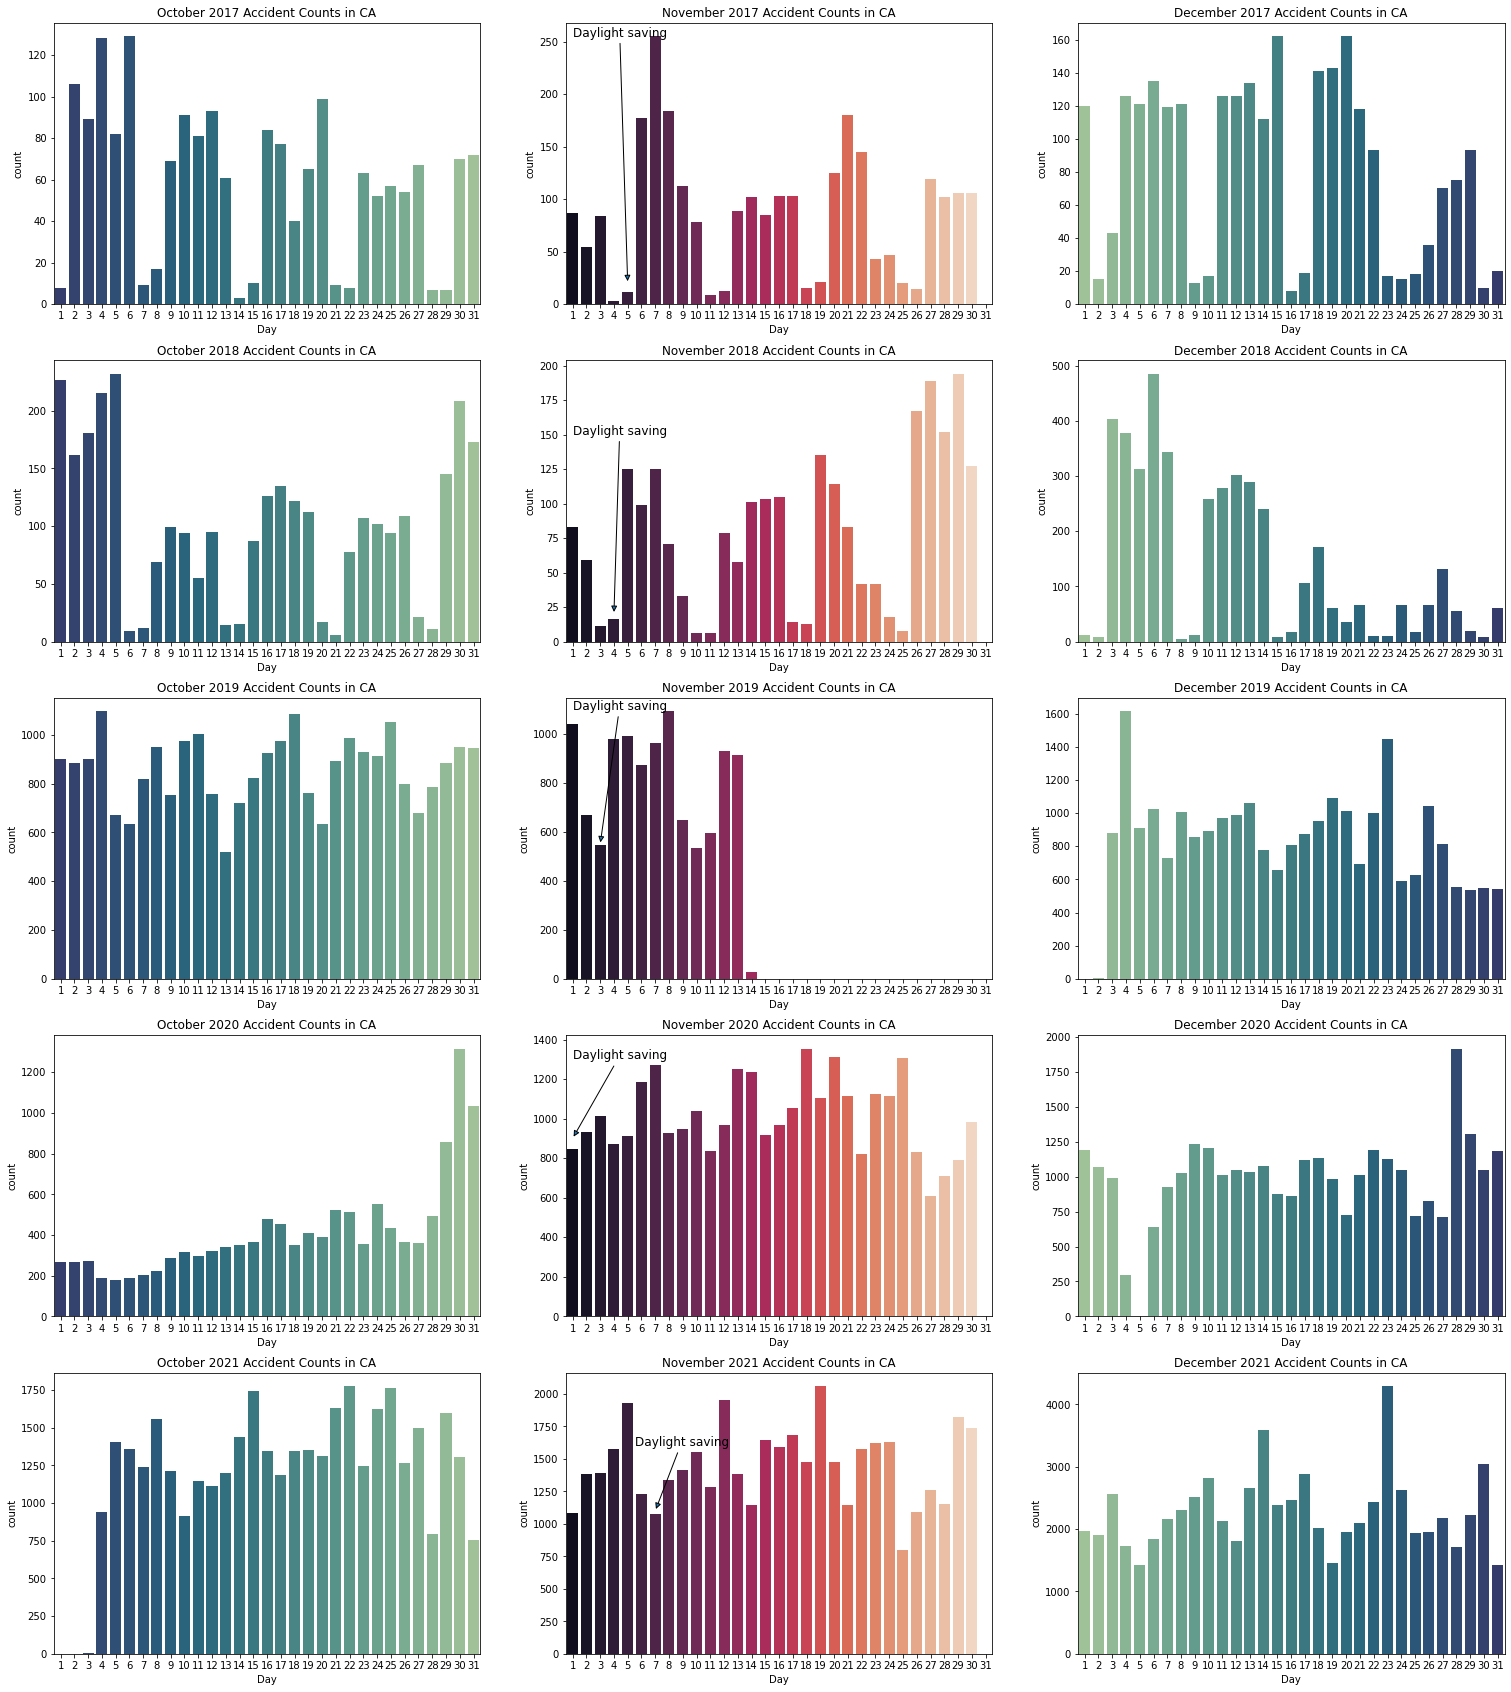

In [15]:
# Create figure
fig, axs = plt.subplots(5, 3, figsize = (26,30))

# Plot countplot of accidents count vs day for "October" 2017~2021 in CA
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 0], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 10)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "crest_r")
    axs[N, 0].set_title("October " + str(Y)+ " Accident Counts in CA")

# Plot countplot of accidents count vs day for "November" 2017~2021 in CA
years = range(2017, 2022)
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 1], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 11)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "rocket")
    axs[N, 1].set_title("November " + str(Y)+ " Accident Counts in CA")
# Marking the day daylight saving occur in CA
axs[0, 1].annotate('Daylight saving',xy=(4,20),xytext=(0,255),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 1].annotate('Daylight saving',xy=(3,20),xytext=(0,150),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 1].annotate('Daylight saving',xy=(2,550),xytext=(0,1100),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 1].annotate('Daylight saving',xy=(0,900),xytext=(0,1300),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[4, 1].annotate('Daylight saving',xy=(6,1100),xytext=(4.5,1600),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

# Plot countplot of accidents count vs day for "December" 2017~2021 in CA
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 2], x=(CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 12)])['Day'],
                  order = list(range(CAdf.Day.min(),CAdf.Day.max()+1)), palette = "crest")
    axs[N, 2].set_title("December " + str(Y)+ " Accident Counts in CA")

##### Countplot of Accident Counts VS Day for October, November, and December in AZ:

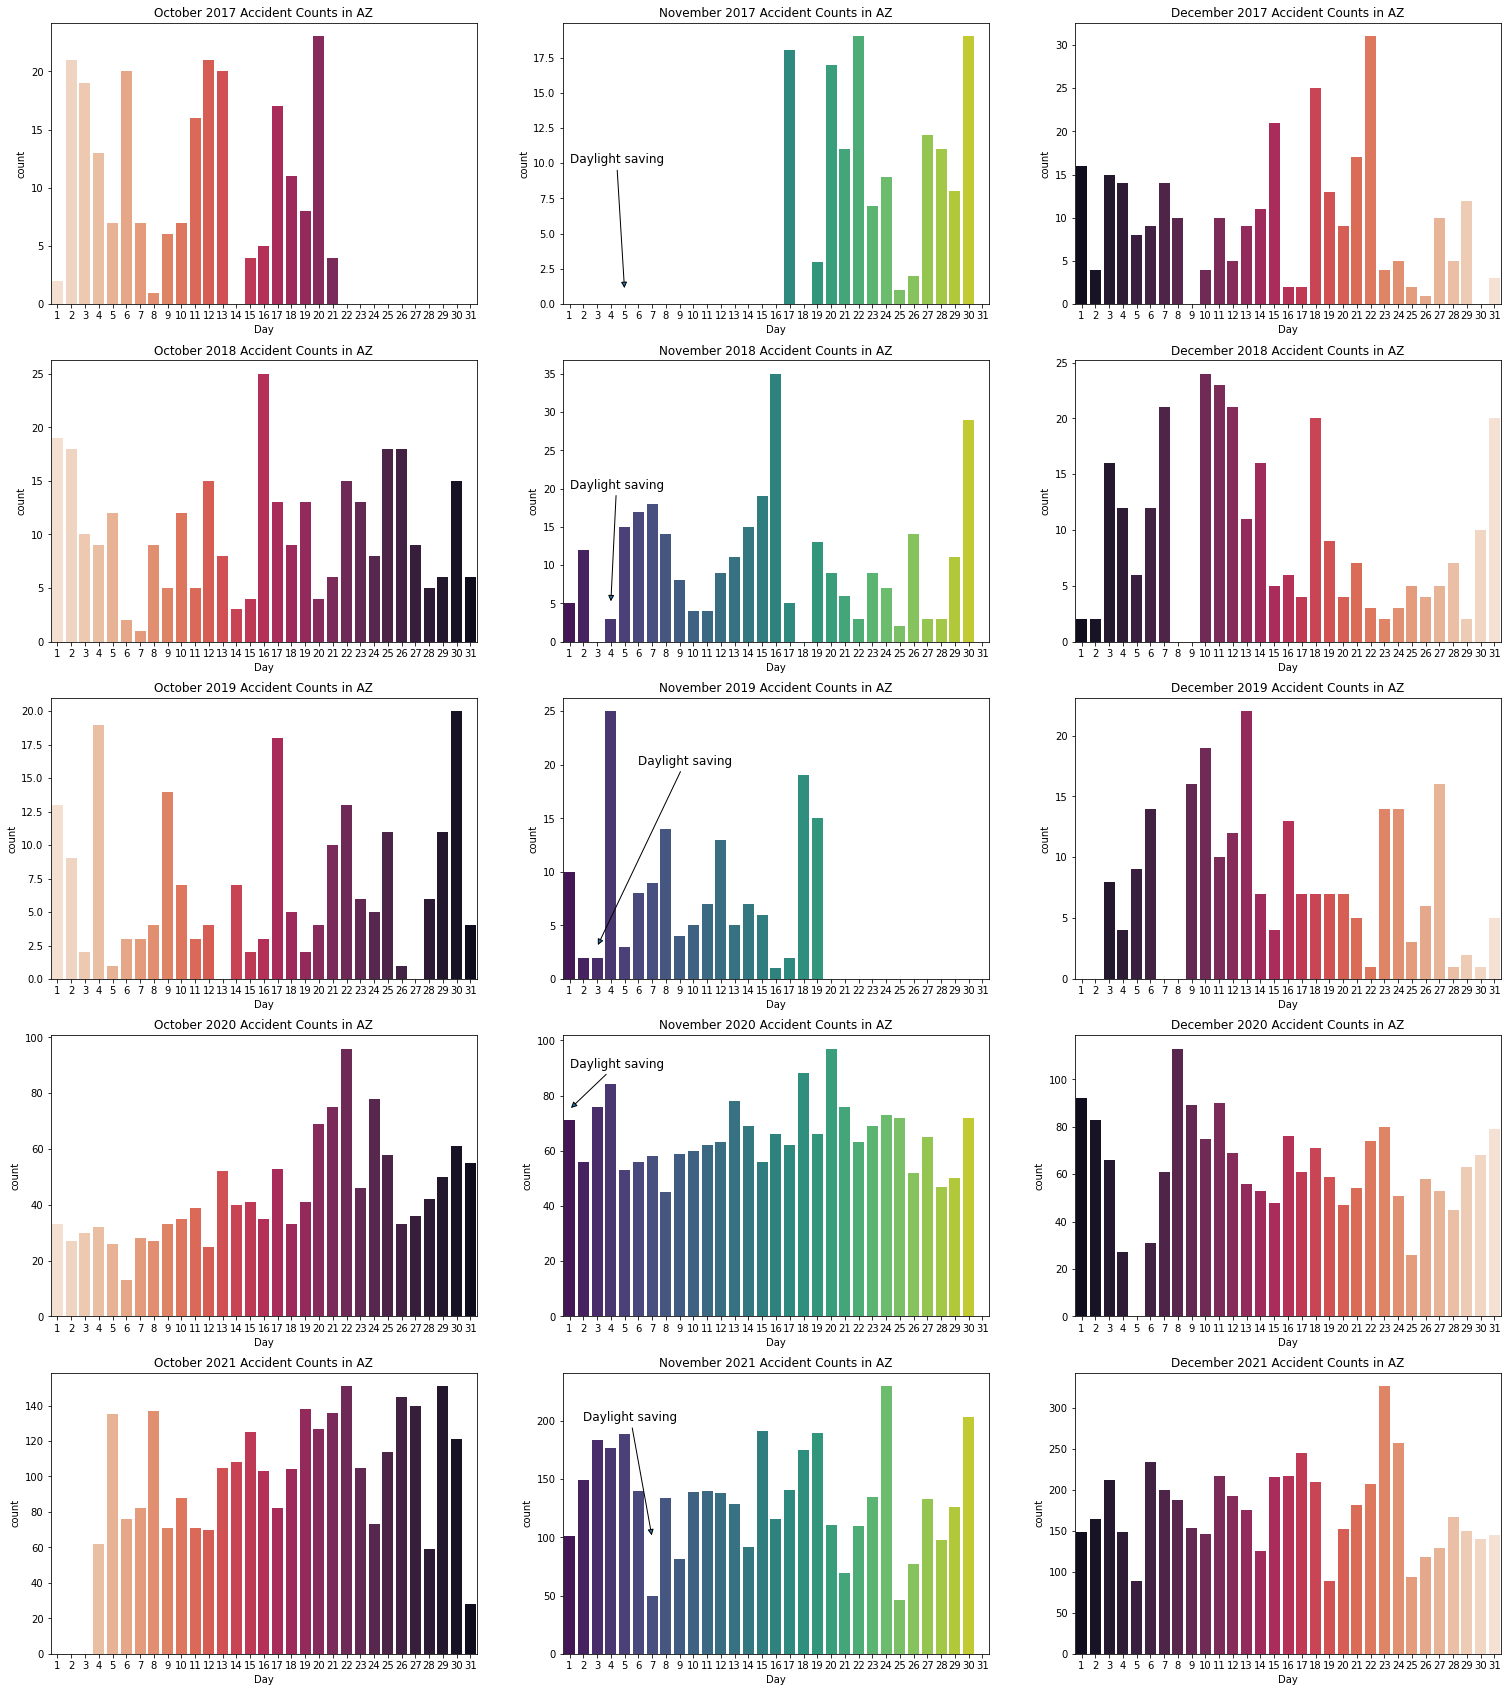

In [16]:
# Create figure
fig, axs = plt.subplots(5, 3, figsize = (26,30))

# Plot countplot of accident counts vs day for "October" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 0], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 10)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "rocket_r")
    axs[N, 0].set_title("October " + str(Y)+ " Accident Counts in AZ")

# Plot countplot of accident counts vs day for "November" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 1], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 11)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "viridis")
    axs[N, 1].set_title("November " + str(Y)+ " Accident Counts in AZ")
# Marking the day daylight saving occur in AZ
axs[0, 1].annotate('Daylight saving',xy=(4,1),xytext=(0,10),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[1, 1].annotate('Daylight saving',xy=(3,5),xytext=(0,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[2, 1].annotate('Daylight saving',xy=(2,3),xytext=(5,20),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[3, 1].annotate('Daylight saving',xy=(0,75),xytext=(0,90),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
axs[4, 1].annotate('Daylight saving',xy=(6,100),xytext=(1,200),arrowprops={'arrowstyle':'-|>'}, fontsize=12)

# Plot countplot of accident counts vs day for "December" 2017~2021 in AZ
for N, Y in enumerate(years):
    sns.countplot(ax = axs[N, 2], x=(AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 12)])['Day'],
                  order = list(range(AZdf.Day.min(),AZdf.Day.max()+1)), palette = "rocket")
    axs[N, 2].set_title("December " + str(Y)+ " Accident Counts in AZ")


Similar to the daylight savings that happen in March, there isn't a clear change to accident counts when daylight saving happens in November. One noticeable outlier is the data for November 2019, nearly half of the month have no accident or possibly no data. However, the accident count for the week right after November 3rd 2019 is very similar compared to other weeks in 2019.

---

### Heatmap Analysis

The heatmap is a method of data collection and presentation in which there is a range of color that expresses a low to high concentration of an event occurring with respect to a color range (usually light to dark), in this case number of accidents. A dark area usually suggests a higher concentration of accidents compared to a lighter area. This helps one to see visually through color which areas have more accidents, and therefore which days by the hour, appear to have more accidents rather than looking at just numerical data, which is difficult to interpret at just a glance. 

The heatmaps we created were useful for more specific analysis surrounding the occurrence of daylight savings and its end. Through the heatmaps, we had a by-the-hour sense of whether accident rates increased immediately following daylight savings in California, and whether that change was similar to the change seen in Arizona. This allowed us to tell what the overall general trends were week-by-week, and whether daylight savings affected these trends, bringing us to our conclusion.

The graph shows the accident data during the time surrounding daylight savings in CA and AZ, to more easily compare the intensity of accidents by the hour. The y-axis shows the hour of the accident, while the x-axis shows the day, and the color (or the heat) of the coordinate shows how many accidents occurred during that time frame.

##### Heatmap of Accident Counts for March and April in CA:

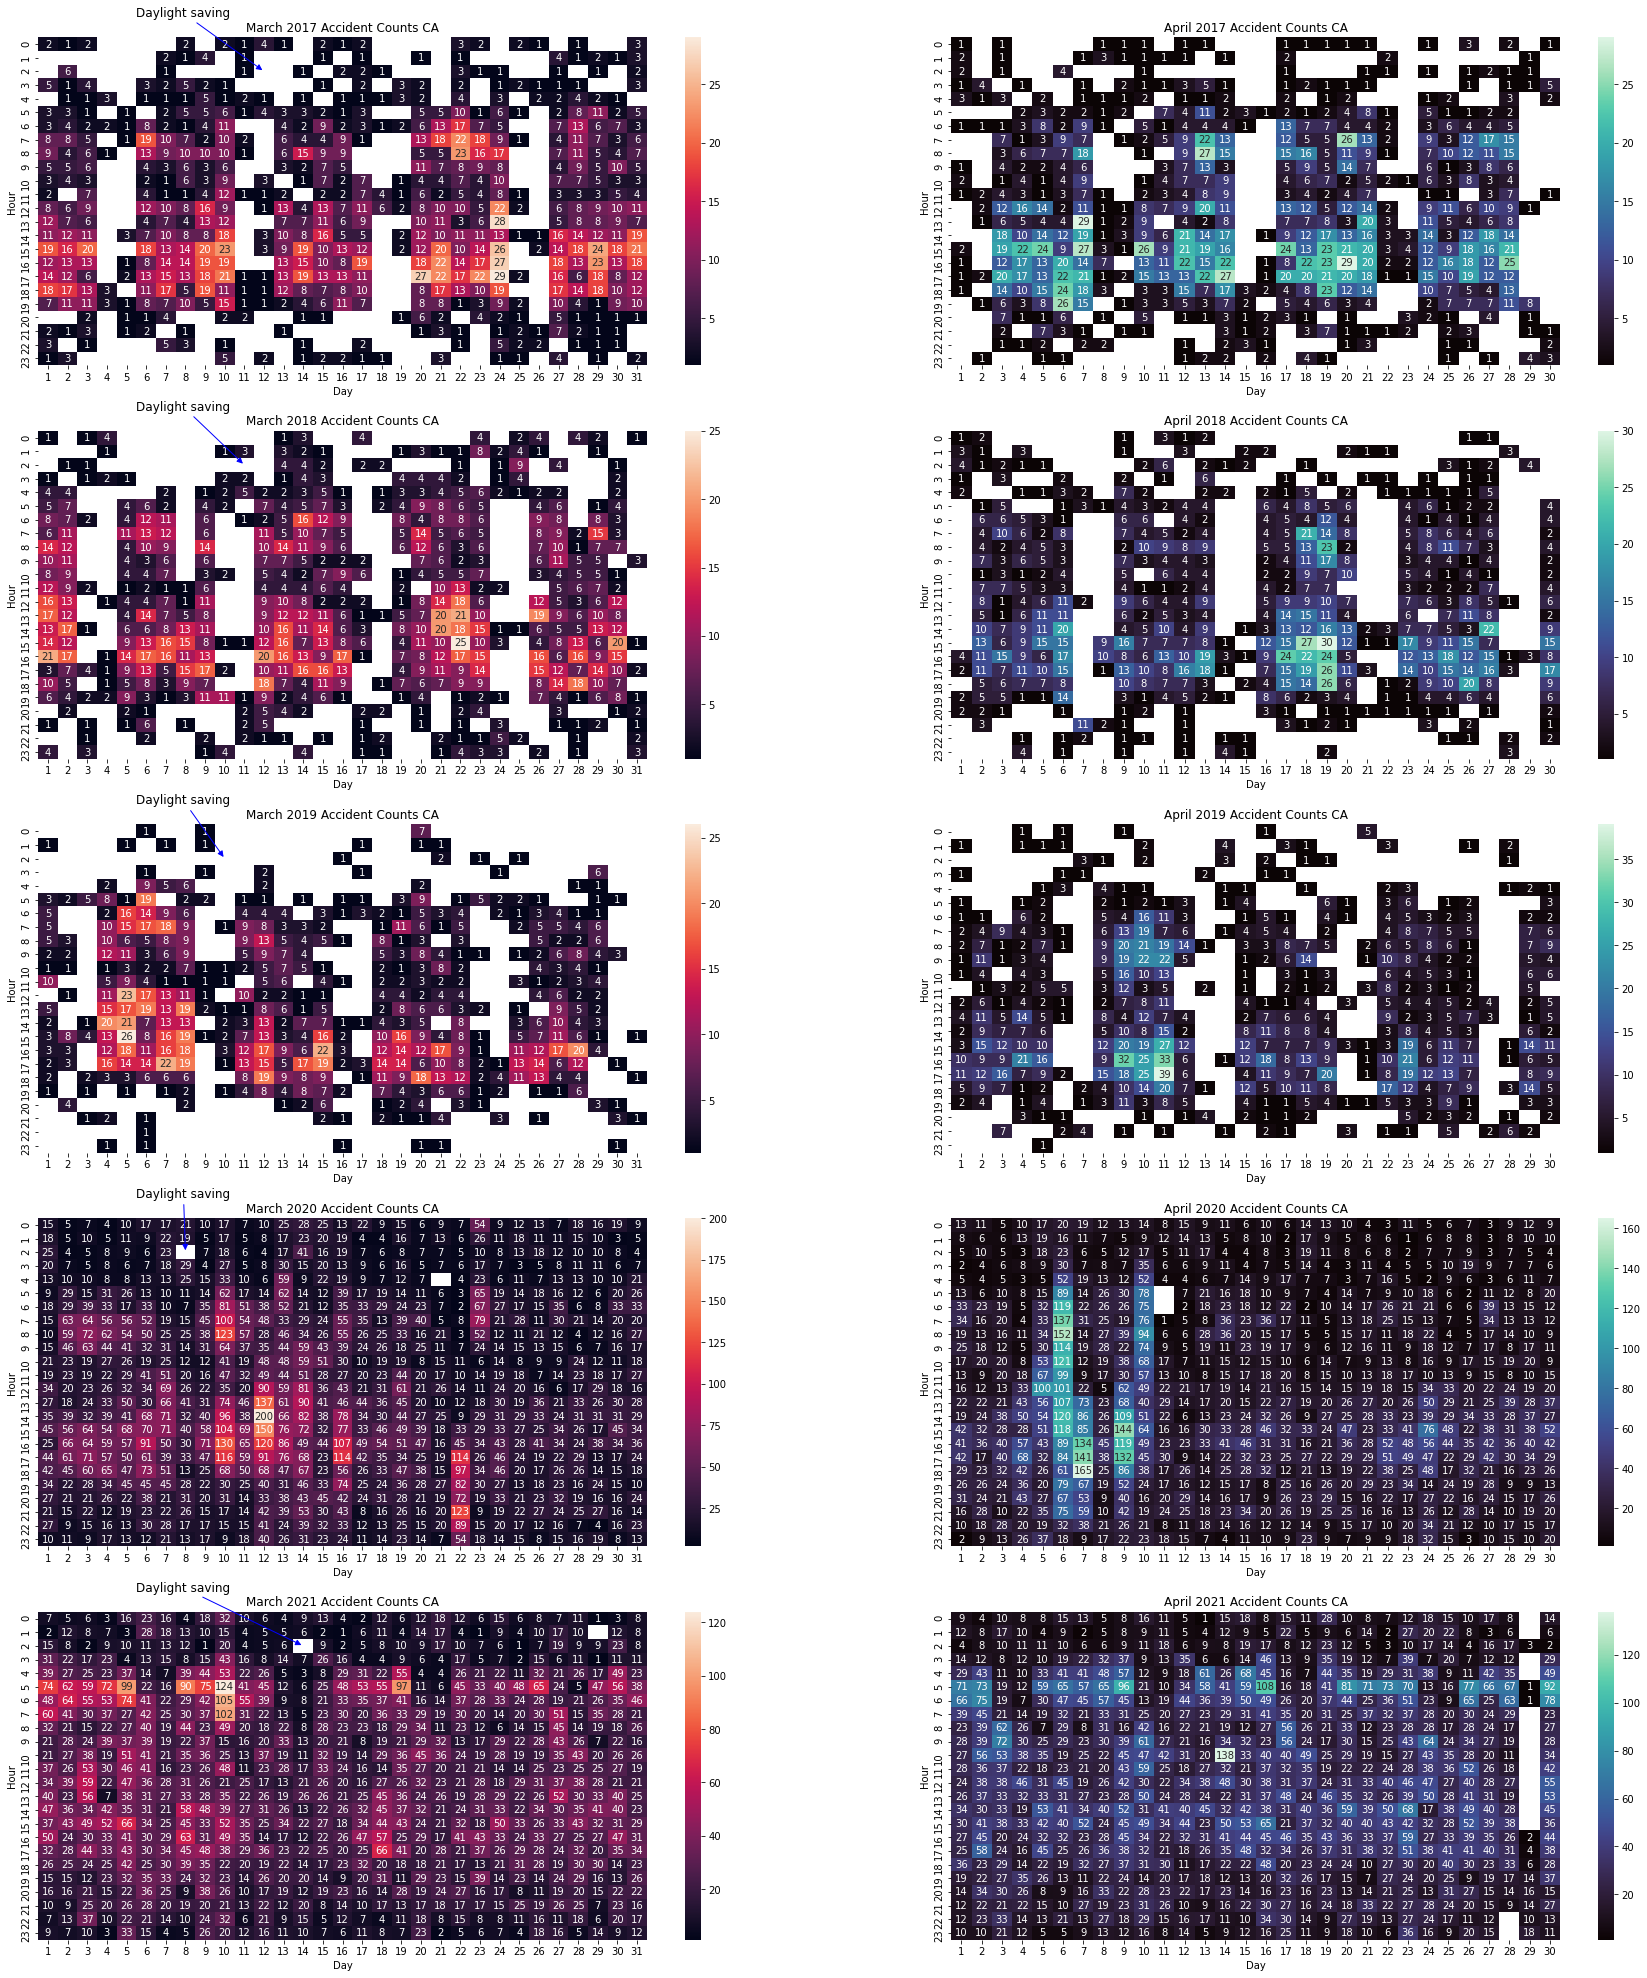

In [17]:
# Create figure
fig, axs = plt.subplots(5, 2, figsize = (30,35))

# Create heatmap from March 2017 to 2021 in CA
for N, Y in enumerate(years):
    data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 3)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 0], )
    axs[N, 0].set_title("March " + str(Y)+ " Accident Counts CA")

# Marking the day daylight saving occur in CA
axs[0, 0].annotate('Daylight saving',xy=(11.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[1, 0].annotate('Daylight saving',xy=(10.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[2, 0].annotate('Daylight saving',xy=(9.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[3, 0].annotate('Daylight saving',xy=(7.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[4, 0].annotate('Daylight saving',xy=(13.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)

# Create heatmap from April 2017 to 2021 in CA
for N, Y in enumerate(years):
    data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 4)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 1], cmap = "mako")
    axs[N, 1].set_title("April " + str(Y)+ " Accident Counts CA")
    

##### Heatmap of Accident Counts for March and April in AZ:

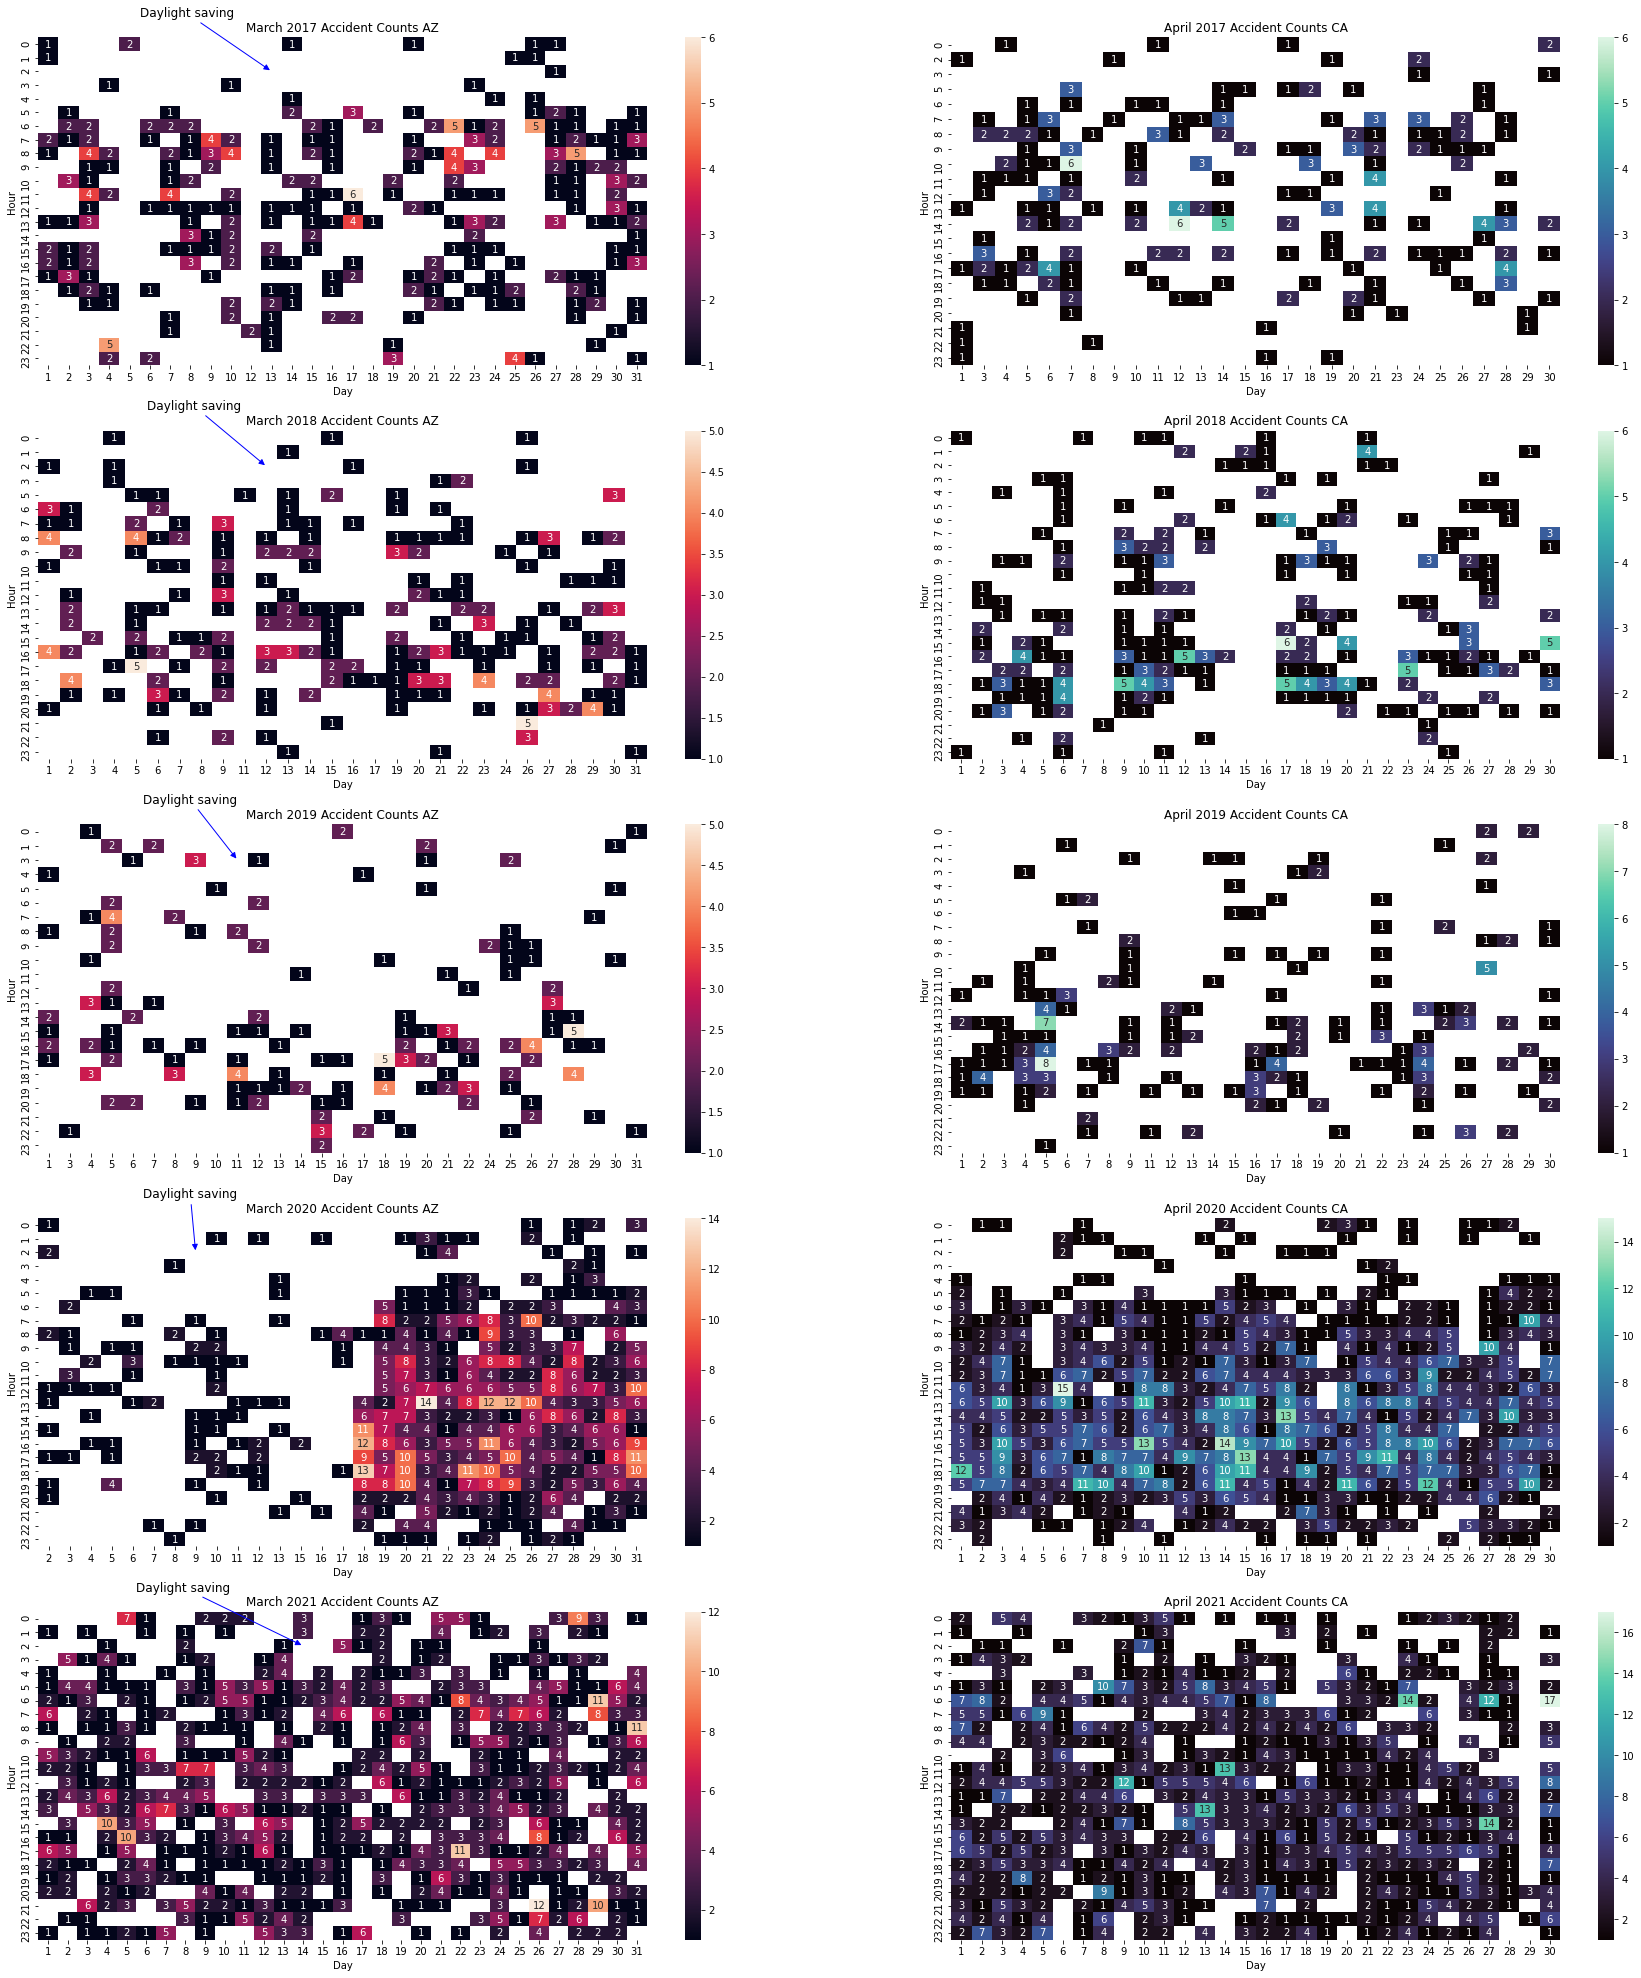

In [18]:
# Create figure
fig, axs = plt.subplots(5, 2, figsize = (30,35))

# Create heatmap from March 2017 to 2021 in AZ
for N, Y in enumerate(years):
    data = pd.pivot_table((AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 3)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 0], )
    axs[N, 0].set_title("March " + str(Y)+ " Accident Counts AZ")

# Marking the day daylight saving occur in AZ
axs[0, 0].annotate('Daylight saving',xy=(11.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[1, 0].annotate('Daylight saving',xy=(10.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[2, 0].annotate('Daylight saving',xy=(9.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[3, 0].annotate('Daylight saving',xy=(7.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)
axs[4, 0].annotate('Daylight saving',xy=(13.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'blue'}, fontsize=12)

# Create heatmap from April 2017 to 2021 in AZ
for N, Y in enumerate(years):
    data = pd.pivot_table((AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 4)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 1], cmap = "mako")
    axs[N, 1].set_title("April " + str(Y)+ " Accident Counts CA")
    

##### Heatmap of Accident Counts for November in CA:

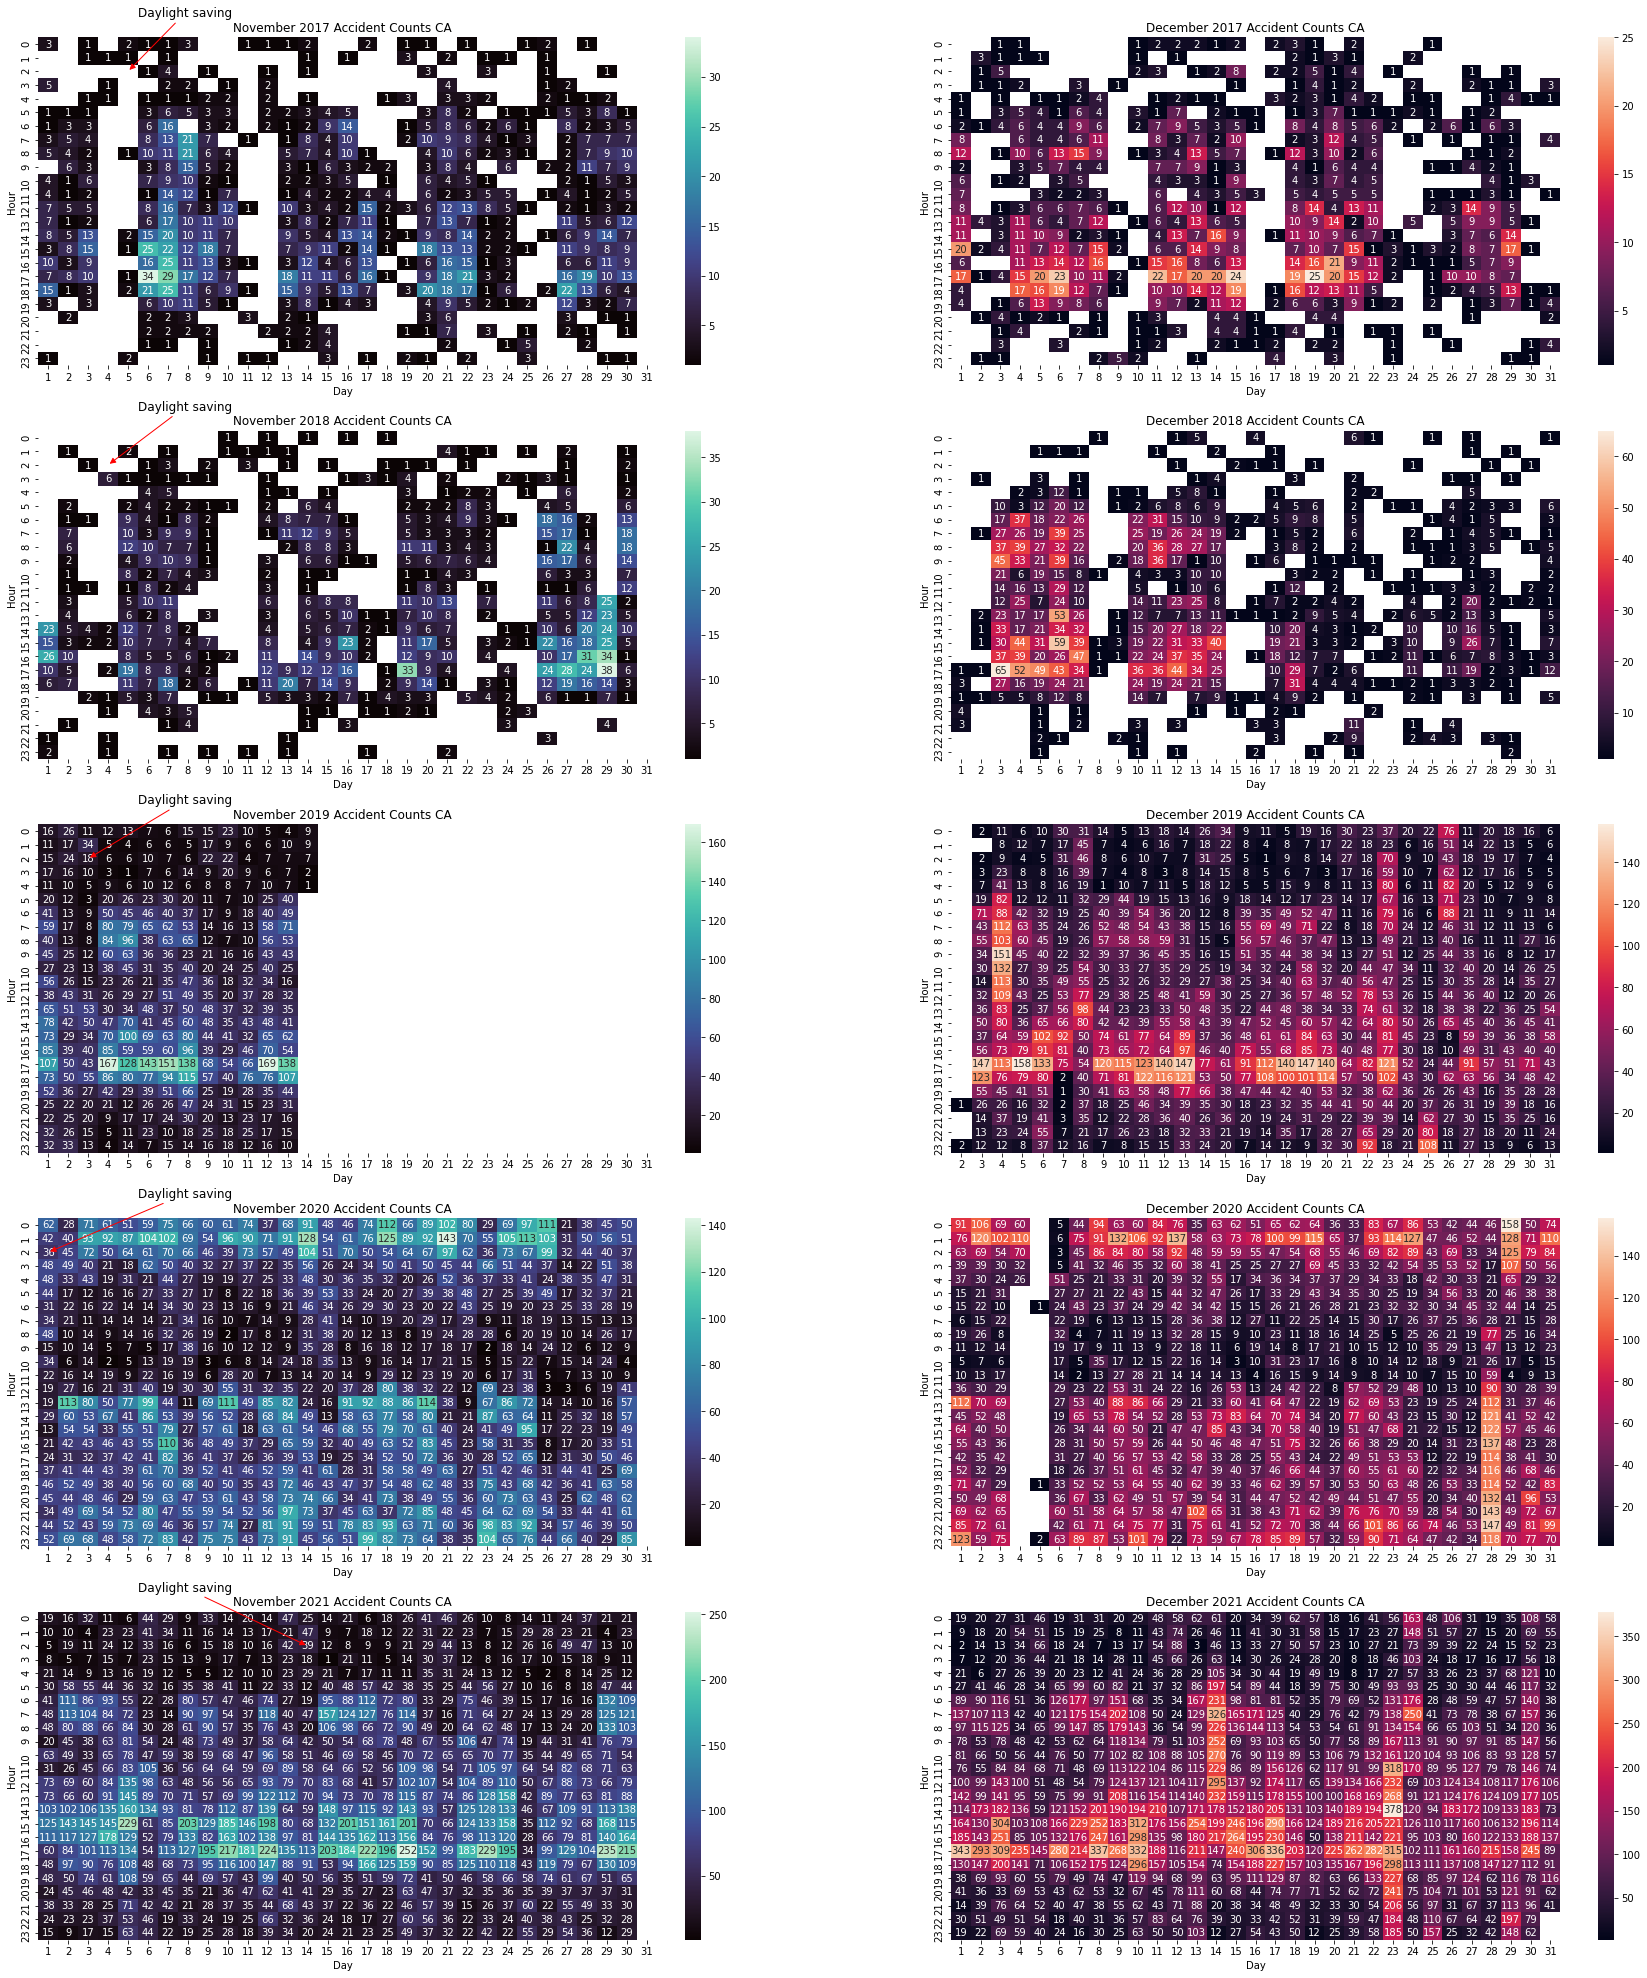

In [19]:
# Create figure
fig, axs = plt.subplots(5, 2, figsize = (30,35))

# Create heatmap from November 2017 to 2021 in CA
for N, Y in enumerate(years):
    data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 11)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 0], cmap = "mako",
                xticklabels=list(range(CAdf.Day.min(),CAdf.Day.max()+1)))
    axs[N, 0].set_title("November " + str(Y)+ " Accident Counts CA")

# Marking the day daylight saving occur in CA
axs[0, 0].annotate('Daylight saving',xy=(4.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[1, 0].annotate('Daylight saving',xy=(3.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[2, 0].annotate('Daylight saving',xy=(2.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[3, 0].annotate('Daylight saving',xy=(0.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[4, 0].annotate('Daylight saving',xy=(13.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)

# Create heatmap from December 2017 to 2021 in CA
for N, Y in enumerate(years):
    data = pd.pivot_table((CAdf[(CAdf['Year'] == Y) & (CAdf['Month'] == 12)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 1])
    axs[N, 1].set_title("December " + str(Y)+ " Accident Counts CA")

##### Heatmap of Accident Counts for November in AZ:

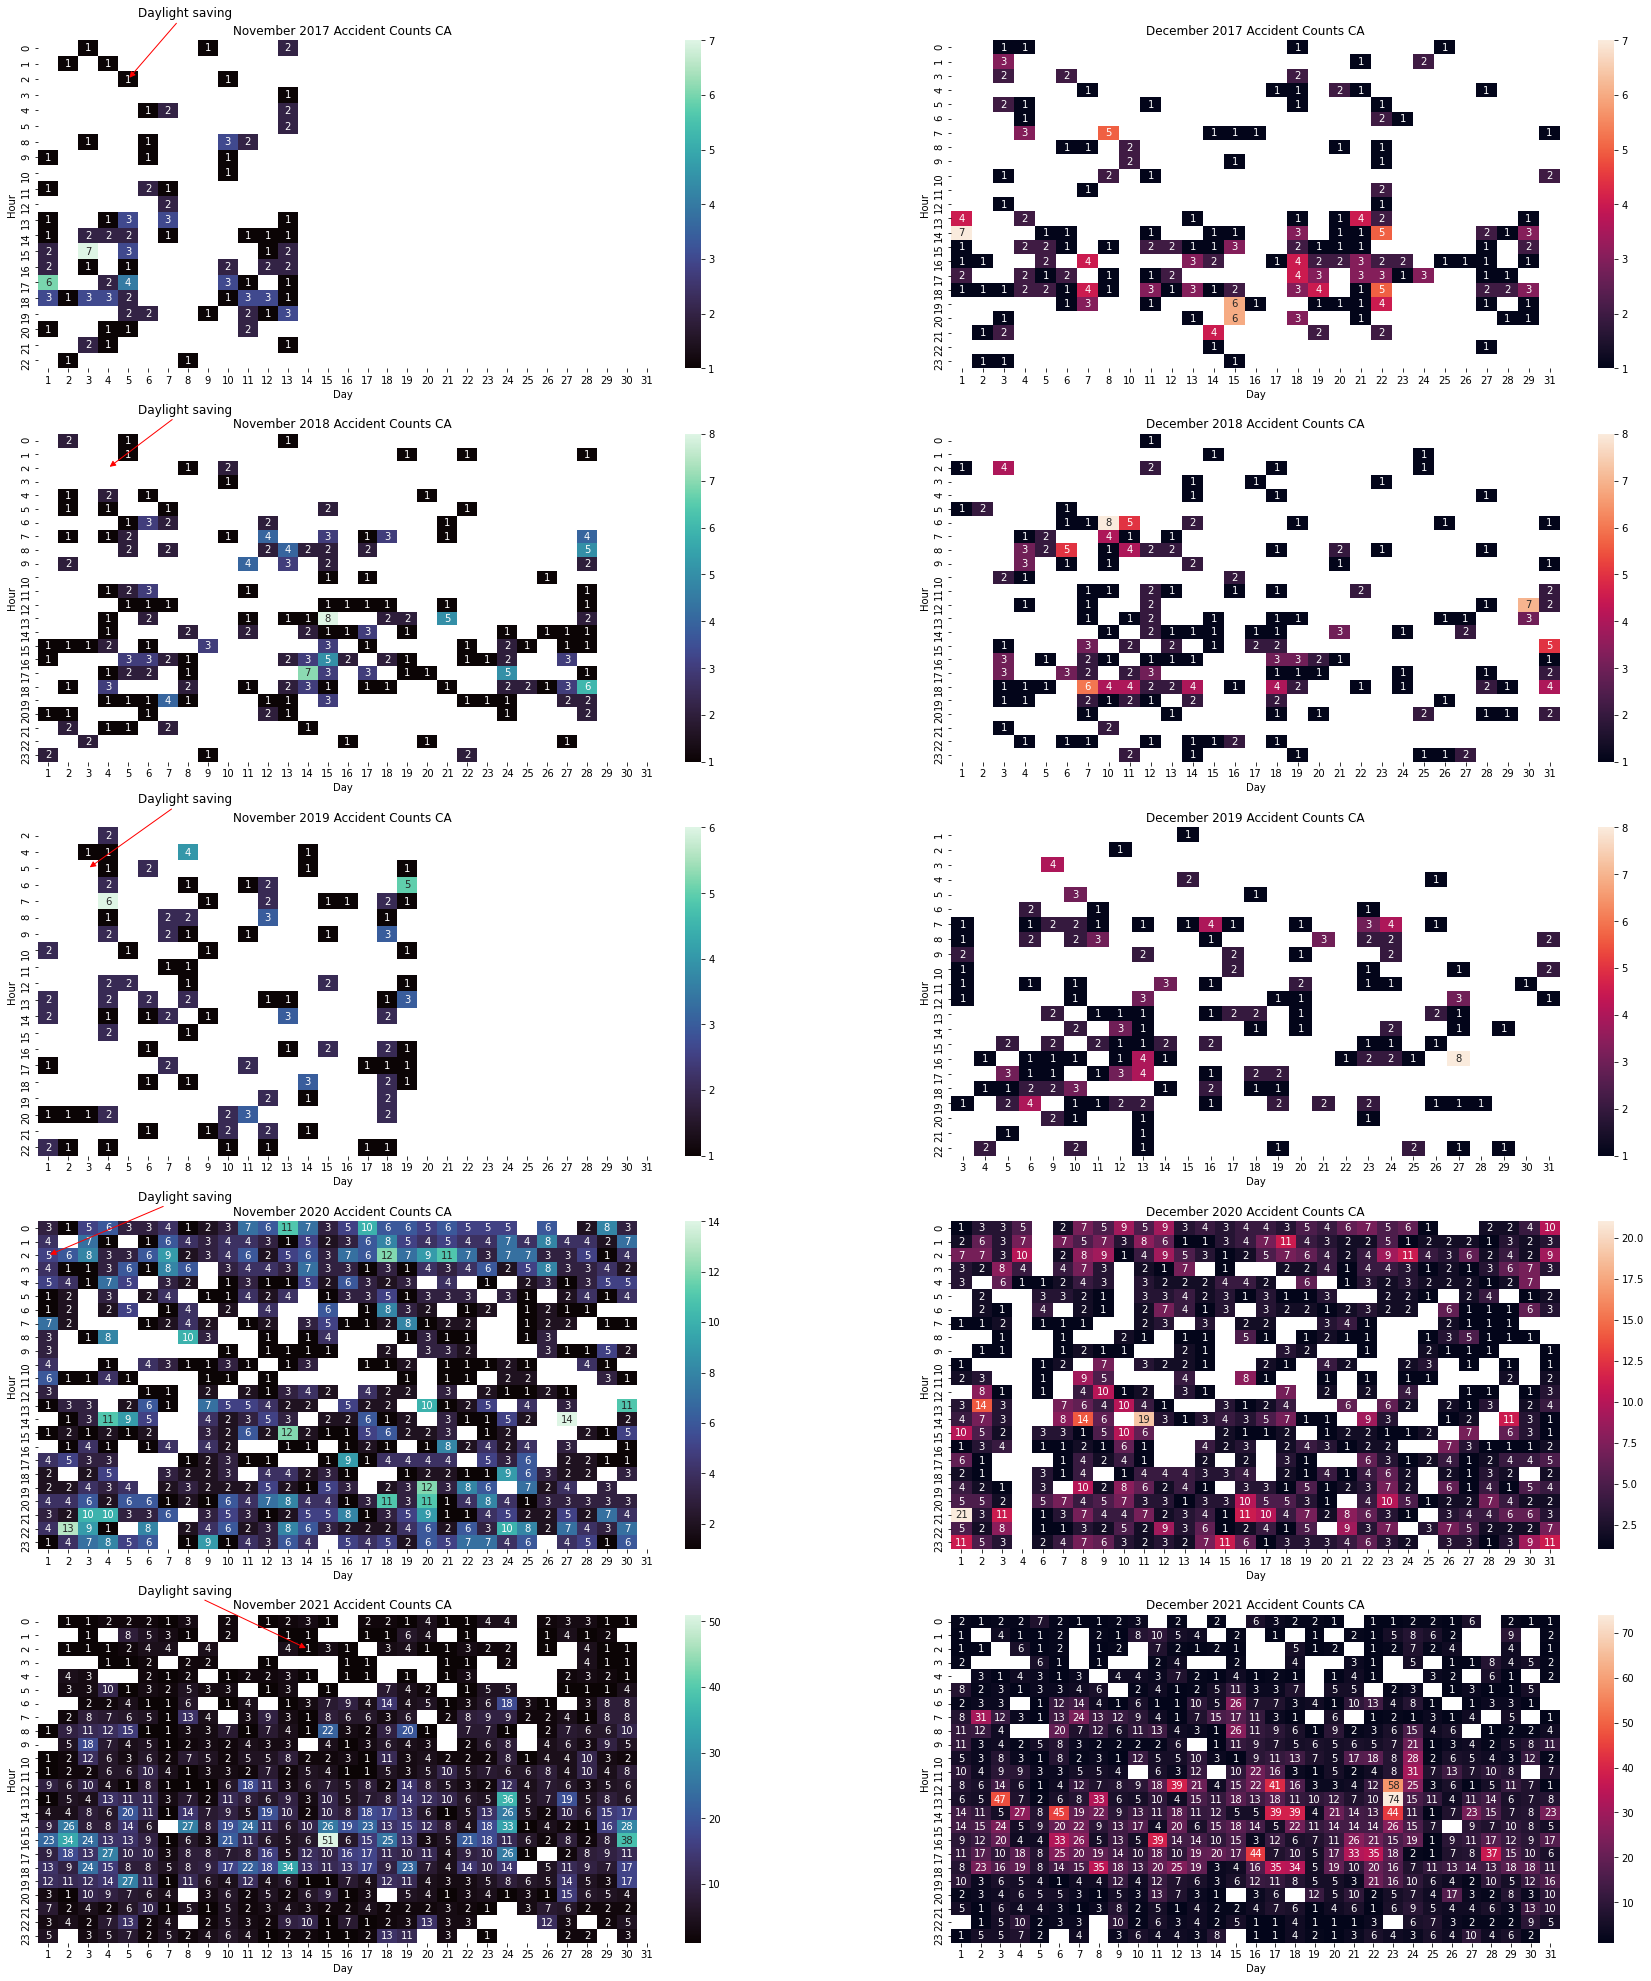

In [20]:
# Create figure
fig, axs = plt.subplots(5, 2, figsize = (30,35))

# Create heatmap from November 2017 to 2021 in AZ
for N, Y in enumerate(years):
    data = pd.pivot_table((AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 11)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 0], cmap = "mako",
                xticklabels=list(range(AZdf.Day.min(),AZdf.Day.max()+1)))
    axs[N, 0].set_title("November " + str(Y)+ " Accident Counts CA")

# Marking the day daylight saving occur in AZ
axs[0, 0].annotate('Daylight saving',xy=(4.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[1, 0].annotate('Daylight saving',xy=(3.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[2, 0].annotate('Daylight saving',xy=(2.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[3, 0].annotate('Daylight saving',xy=(0.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)
axs[4, 0].annotate('Daylight saving',xy=(13.5,2.5),xytext=(5,-1.5),
                arrowprops={'arrowstyle':'-|>', 'color':'red'}, fontsize=12)

# Create heatmap from December 2017 to 2021 in AZ
for N, Y in enumerate(years):
    data = pd.pivot_table((AZdf[(AZdf['Year'] == Y) & (AZdf['Month'] == 12)]), 
                          values='State', index='Hour', columns='Day',
                          aggfunc='count')
    sns.heatmap(data, annot=True, fmt=".0f", ax=axs[N, 1])
    axs[N, 1].set_title("December " + str(Y)+ " Accident Counts CA")

The distribution the variables tend towards is that accidents tend to occur more in the evening hours of the day on weekdays, and are minimal on the weekends. The greatest outlier in this data would be the year 2020, when significantly more accidents were reported compared to prior years. When comparing the accidents that occurred after daylight savings ended in November showed negligible change in rates of accidents based on looking at these heatmaps, and we see a similar lack of change after it begins in March. If daylight savings was causing more accidents, we’d expect to see more of an outlier when the time shifted, though we may only be missing differences due to them being smaller, or a lack of controlling variables/knowing what to control.

___

# Ethics & Privacy

Ethical concerns over answering this question involves whether or not those impacted by the car accidents in the provided dataset would feel okay with that information being handled for this purpose. Car accidents are not typically a matter of public record in the state of California, so we must take into consideration additional steps when handling private data such as this, especially due to its sensitive nature given the possible death and tragedy that occurred as a result of the car accidents recorded in this data set. 

ince we decided to focus on California and it’s a more diverse state than most in the country, there are naturally populations to be taken into consideration as well as the stereotypes associated with them in regards to “bad driving”. Women tend to be seen as bad drivers, but this stereotype tends to reach Latinx and Asian drivers, as well, both populations which are much more frequent in California than the majority of the US. Because of this, there are innate biases one may have when handling this data and determining possible causes for a car accident in the data set. We want to make sure that when we draw a correlation, it’s based on the time of day and the likeliness of that being the reason for the car accident, and not because a person of a particular gender or race is a “bad driver”. The dataset is captured through a variety of collection methods including reports from departments of transportation and law enforcement, traffic cameras, and some other sensors. The collection of data using traffic cameras and road sensors likely creates a bias towards data being from urban areas while traffic accidents from rural areas are likely to be less accurately collected.

The way we addressed these issues is twofold; first on a privacy basis, is checking first that the data found did not include the persons’ names, personal information, nor any details of the car accident other than the accident occurred at a particular date and time for the sake of investigating our hypothesis. Second, on a biases standpoint, we also saw that any identifiers including one’s ethnic background, nationality, immigration status etc was not exposed when extracting and surveying this data, thereby eliminating any biases against a particular population to fester in the first place to then perpetuate harmful stereotypes as well as delegitimize results. Ultimately by being able to handle this data in a safe and considerate manner, we will be able to note particular trends when car accidents are most likely to happen during Daylights Savings, thereby warning drivers to take increased caution in those periods, providing a net positive overall.

It is known that the jump forward in time-or when daylight savings begins-has caused a negative trend in the health of people, specifically the increased rates of heart attacks and death caused by this rate. This could be a result of the circadian rhythm that all living organisms abide by. A sudden change in this rhythm unsurprisingly has a staggering effect on a person’s wellbeing. Knowing that daylight savings affects the health of a person, those that are more prepared to deal with such sudden changes are therefore more likely to not be negatively affected by the change, leading to a bias in wealth, resources, etc.

___

# Conclusion & Discussion

### Conclusion

The question we set out to answer was whether accidents occur more often when the time is switched to daylight savings, and if so, will the future permanent change to daylight savings mean that more accidents will occur during that change? 

We hypothesized that there would be an increase in accident rates after switching to/from daylight savings, due to changes in people’s sleep cycles and general routines, moreover the circadian rhythm of people. **However, based on our findings comparing California and Arizona accident rates/times, we would conclude that no, accidents did not occur more often when the time was switched to daylight savings. This implies that there would not be much of a change should we switch to a permanent state of daylight savings, therefore this analysis does not support our hypothesis.**

### Discussion:

##### Limitations of Analysis:

Our analysis did have some problems that shed some uncertainty on our conclusion. In a larger sense, due to time constraints and other logistical issues this quarter, we were unable to do too much hard comparative analysis, so our conclusion is restricted to a more visual analysis, based on the different plots we created.

We analyzed the plots by creating one for California (which has daylight savings) and a corresponding one for Arizona (which doesn’t have daylight savings), and then comparing these two plots to see whether changes in accident rates in California are different to those in Arizona. However, this analysis did not control for possible differences between California and Arizona. Possible differences that were not accounted for that might be important are the tendencies of drivers, weather, importance of driving as a commute, and density of drivers within each of the states. These factors, although currently unanalyzed in our project, could have profound effects on the rate of accidents within the states. 

As for the limitations of our specific plots, we believe that the plots we created cover a wide enough range of visualizations for us to make an effective surface-level analysis, though as mentioned earlier, our specific hard comparative analysis isn’t available. Further numerical analysis that could have been considered is comparing not just the count of accidents, but the rate at which accidents were happening between the sets of data that we were comparing (CA to AZ, months to months etc.). We also did not do a proportional analysis since we know from the dataset that California has the highest recorded number of accidents compared to other states. Despite this, it did not overwhelmingly affect our graphical depiction of counts of accidents and comparing them to Arizona. Therefore we believe that our plots are still a very effective way of analyzing our data and answering our questions.

---

# Team Contributions

- **Louisa Black:** Overview, research question, data, hypothesis, plot analysis, EDA code, conclusion.
- **Hank Liao:** Background, data cleaning, plot analysis, EDA code, documation of the project.
- **Logan Miller:** Background, plot analysis, Ethics & Privacy.
- **Jacob Paulson:** Conclusion, plot analysis, conclusion.
- **Fatima Shirazi:** Ethics & Privacy, plot analysis.

# Video Link

Link: https://drive.google.com/file/d/1rpYK_CUIsUdh3_MdV6Ct7n8Xve9U5mcS/view?usp=sharing

Our slide and video are in a google drive link above.